# Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data display coustomization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# Load data set
df = pd.read_excel('D:/EXCELR/Assignments/Clustering/EastWestAirlines.xlsx', sheet_name ="data")
# first 5 rows

df.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# info and null count
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
# different cc_miles have different max values.
unique_cc1 = df.cc1_miles.unique()
unique_cc2 = df.cc2_miles.unique()
unique_cc3 = df.cc3_miles.unique()

print(unique_cc1)
print(unique_cc2)
print(unique_cc3)

[1 4 3 2 5]
[1 2 3]
[1 3 2 4 5]


In [10]:
# null count for columns

null_count_col = df.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    12
Name: count, dtype: int64 

Null Percentage for Columns:

 0.0    12
Name: count, dtype: int64


In [11]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
Name: count, dtype: int64 

Null Percentage for Rows:

 0.0    3999
Name: count, dtype: int64


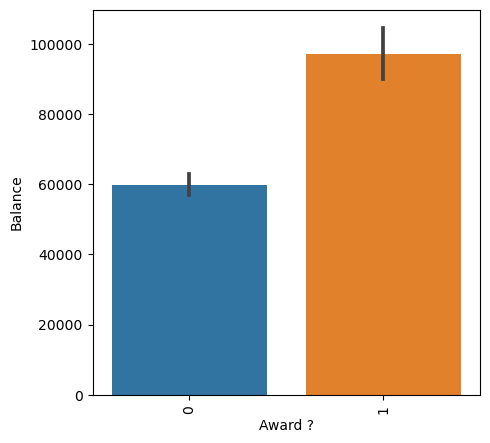

In [13]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award?','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award?', y='Balance', data= Balance)
ax.set(xlabel = 'Award ?', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [14]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award?               0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID#                 -0.243737
Name: Balance, dtype: float64

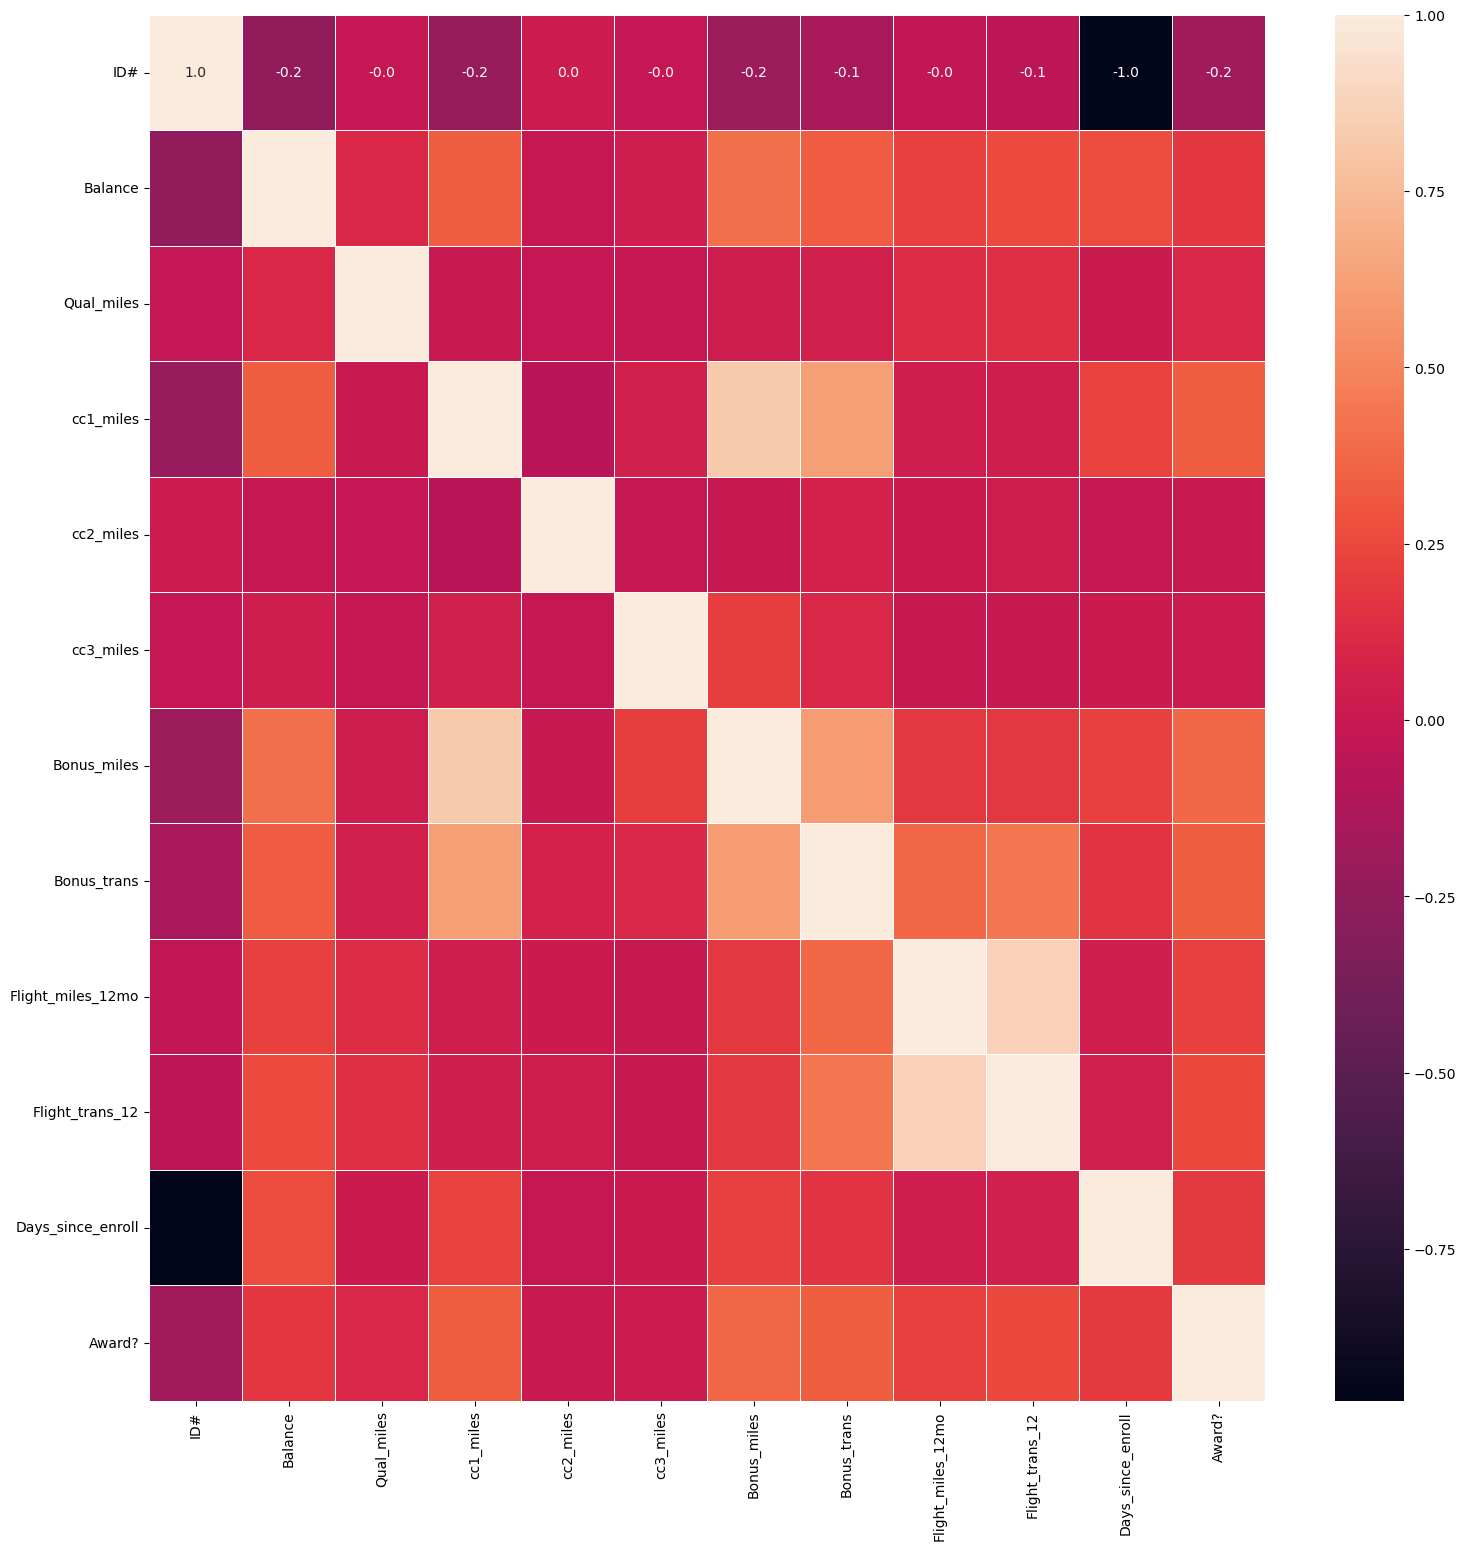

In [15]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

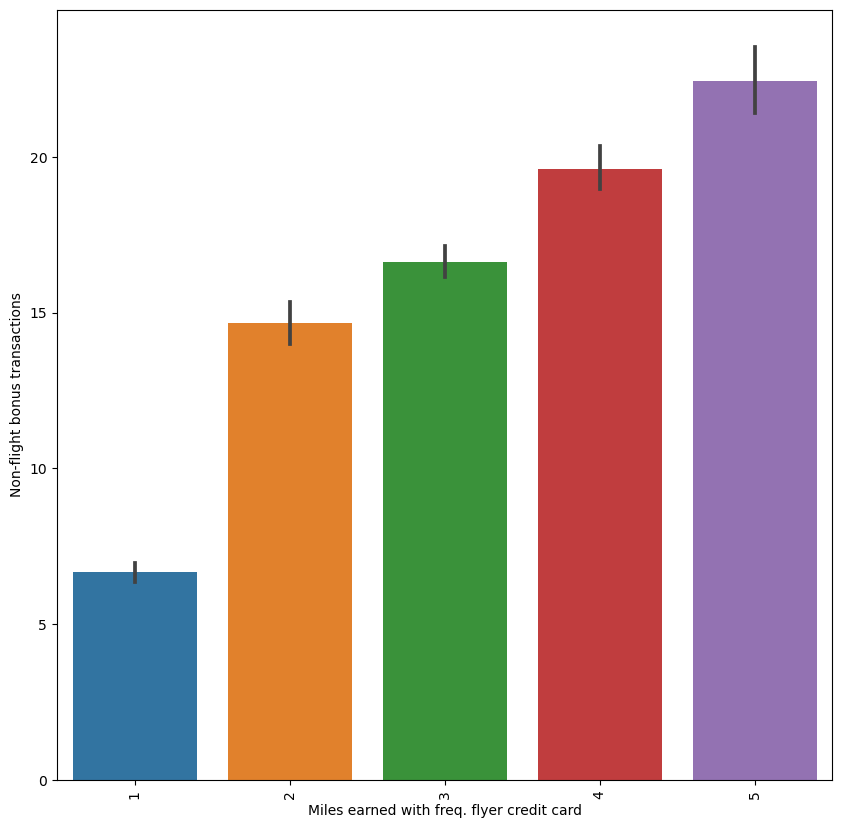

In [16]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [17]:
#People who fly more frequently use bonus transactions more

ID#


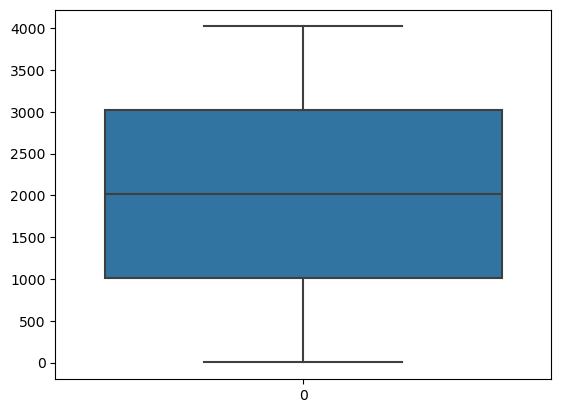

Balance


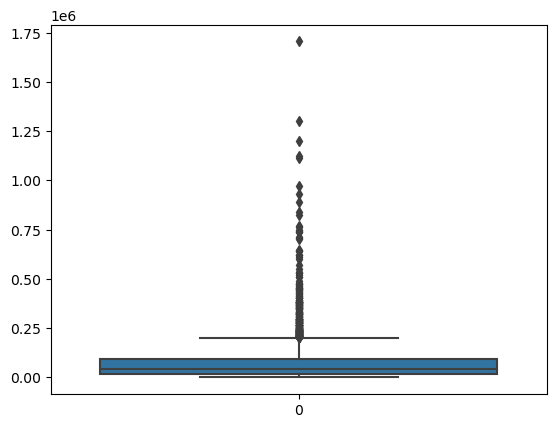

Qual_miles


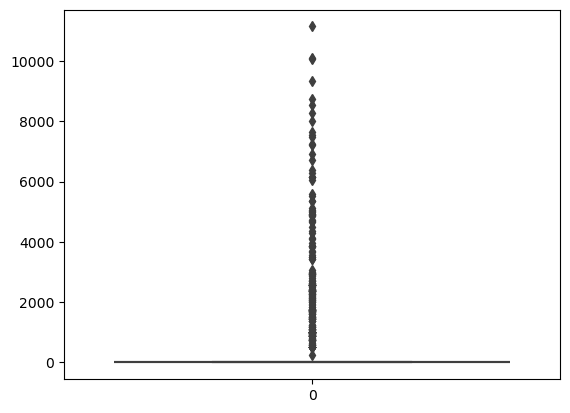

cc1_miles


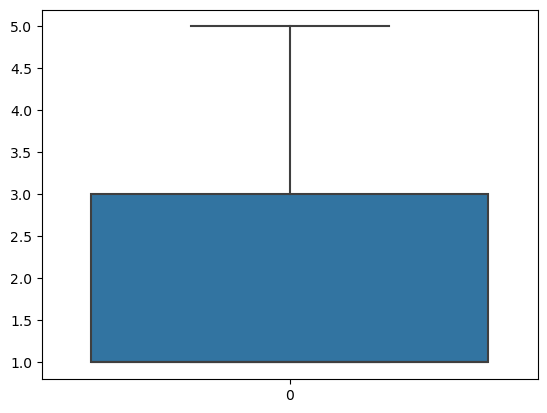

cc2_miles


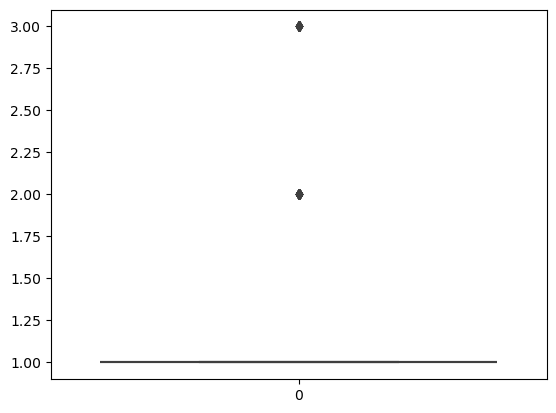

cc3_miles


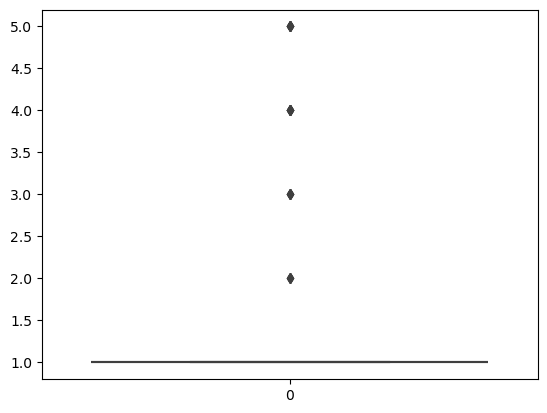

Bonus_miles


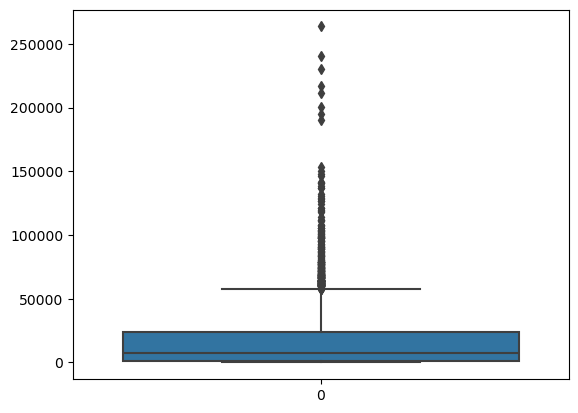

Bonus_trans


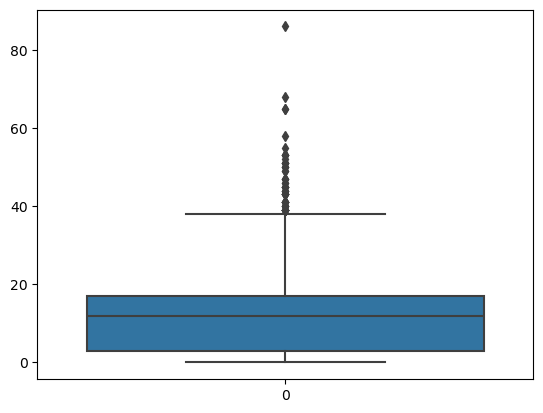

Flight_miles_12mo


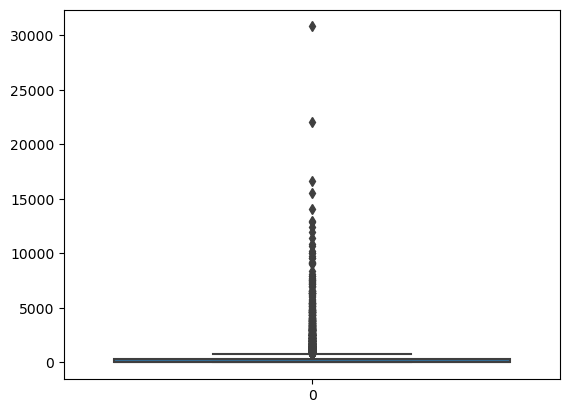

Flight_trans_12


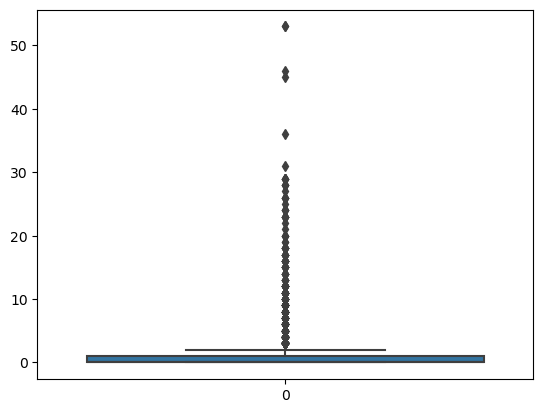

Days_since_enroll


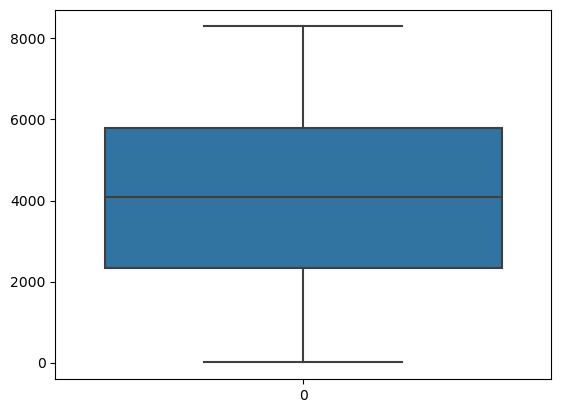

Award?


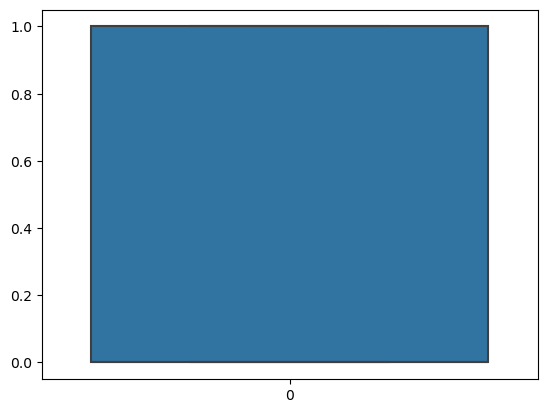

In [18]:
# Box Plot for every feature, singled out
    
for n in df.columns:
    print(n)
    sns.boxplot(df[n])
    plt.show()

<Axes: >

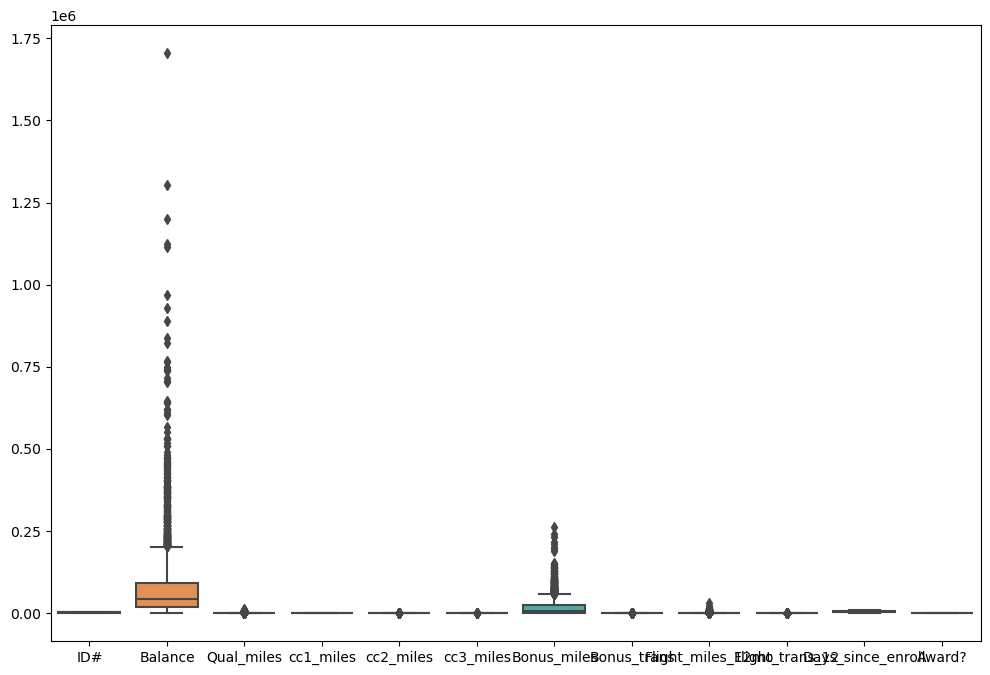

In [19]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=df)

<Axes: >

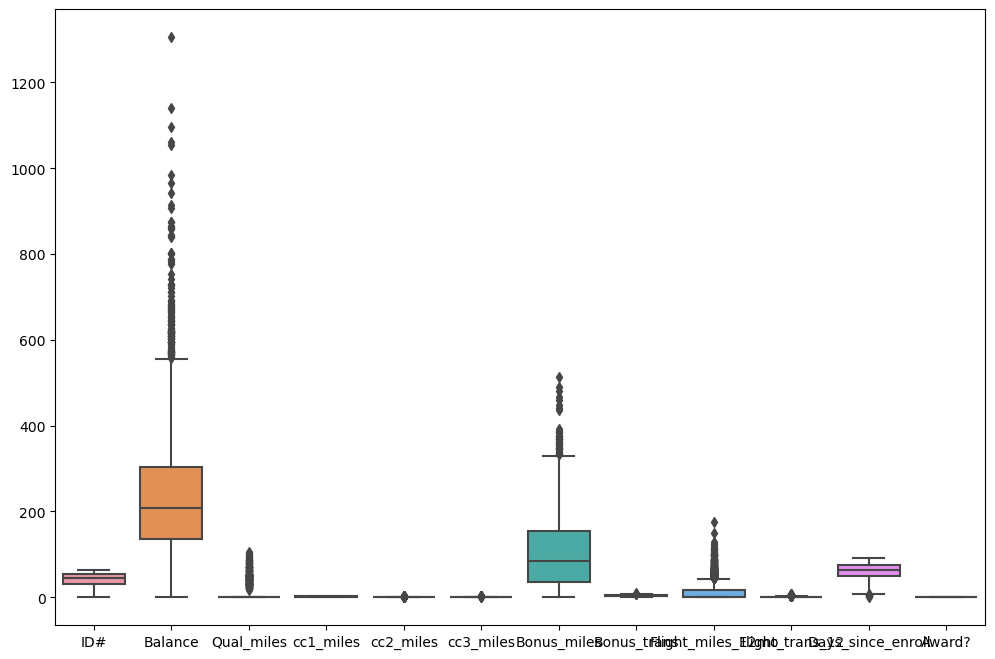

In [20]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

In [21]:
# removing the outliers from Balance

q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['Balance']>ll)&(df['Balance']<ul)]

df1.head(100)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,108,3734,0,5,1,1,61096,18,150,2,6760,1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1
107,110,43498,0,1,1,1,0,0,0,0,6759,1
108,111,84674,0,4,1,1,46335,14,50,1,6738,1


In [22]:
#Even in this small sample, we can see that the last few lines of df1.head() are different, so removing the outliers seems to have worked. Now to visualize;

<Axes: >

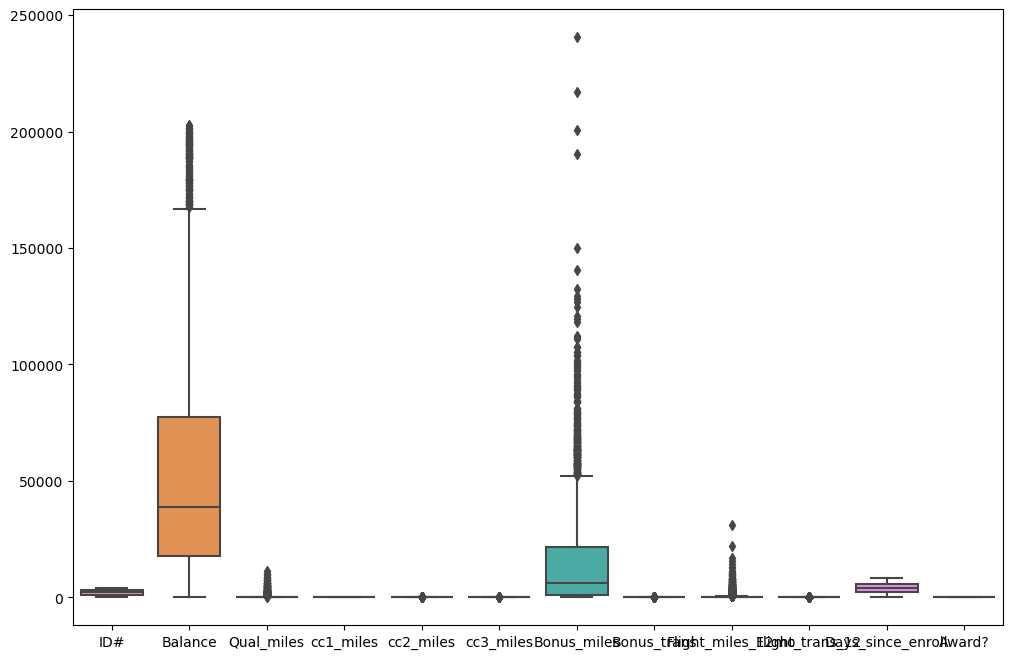

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

In [24]:
df_shape = df.shape

df1_shape = df1.shape

print("shape of original dataframe:", df_shape, "\n")
print("shape of new dataframe:", df1_shape)

shape of original dataframe: (3999, 12) 

shape of new dataframe: (3733, 12)


<Axes: >

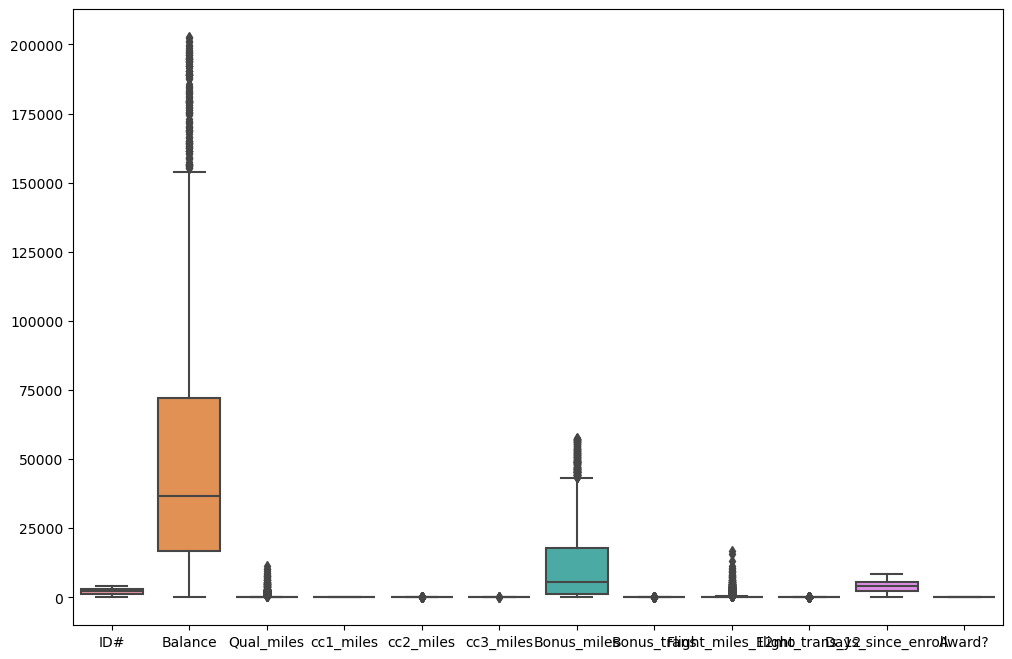

In [25]:
# removing outliers from Bonus_miles:

q1 = df['Bonus_miles'].quantile(0.25)
q3 = df['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Bonus_miles']>ll)&(df1['Bonus_miles']<ul)]

plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

<Axes: >

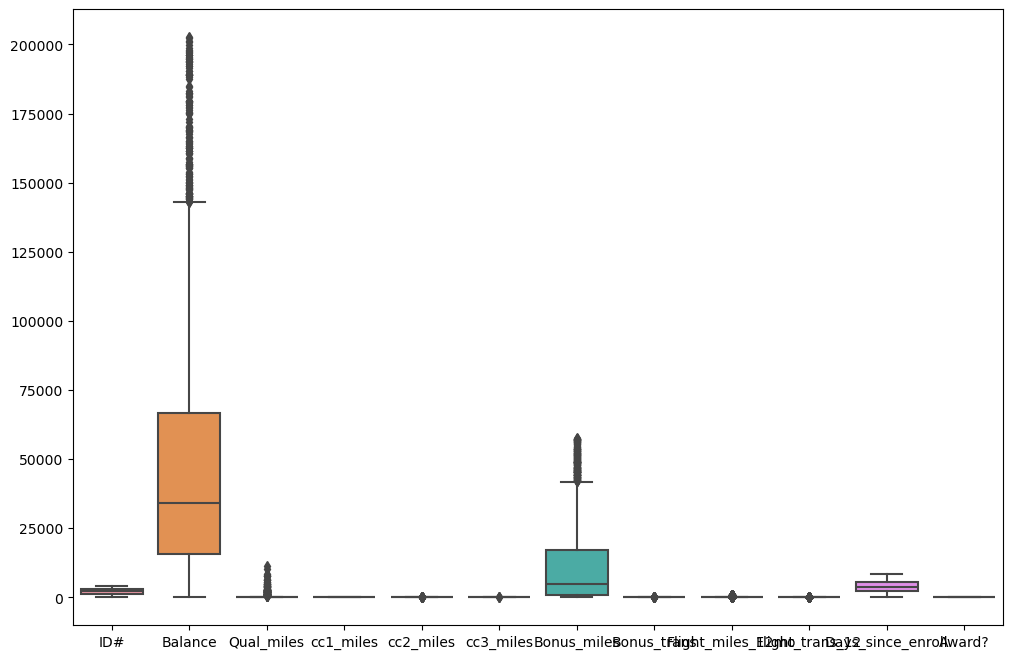

In [26]:
# Removing outliers from Flight_miles_12mo

q1 = df['Flight_miles_12mo'].quantile(0.25)
q3 = df['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Flight_miles_12mo']>ll)&(df2['Flight_miles_12mo']<ul)]
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

<Axes: >

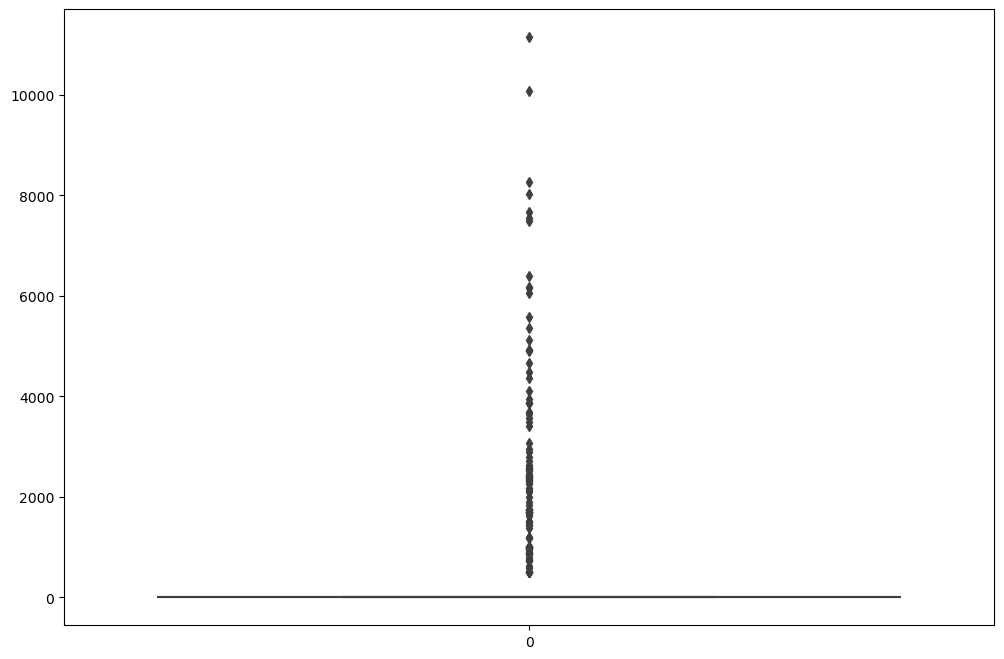

In [28]:
q1 = df['Qual_miles'].quantile(0.25)
q3 = df['Qual_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df4 = df3[(df3['Qual_miles']>ll)&(df3['Qual_miles']<ul)]

plt.figure(figsize=(12,8))
sns.boxplot(data=df4)

sns.boxplot(df3['Qual_miles'])

In [29]:
# The amount of outliers Qual_miles has seems too many (therefore too important) to be removed, so we continue with df3.

<Axes: >

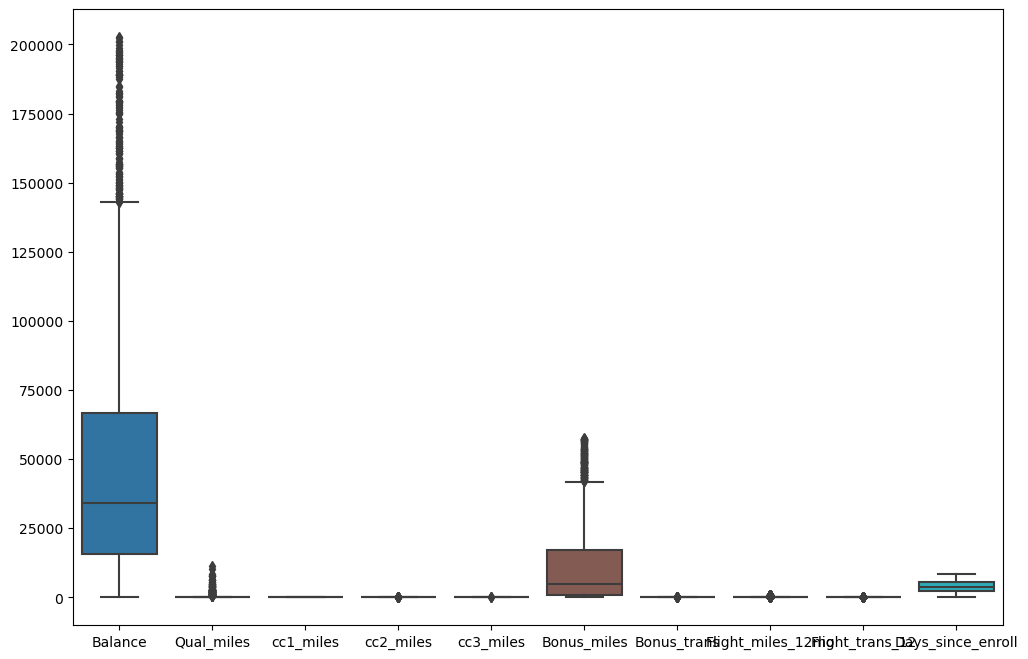

In [32]:
# we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  df3.drop(['ID#','Award?'], axis=1)
dataset1.head()

# our final boxgraphs with ID & Award removed

plt.figure(figsize=(12,8))
sns.boxplot(data=dataset1)

Balance


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


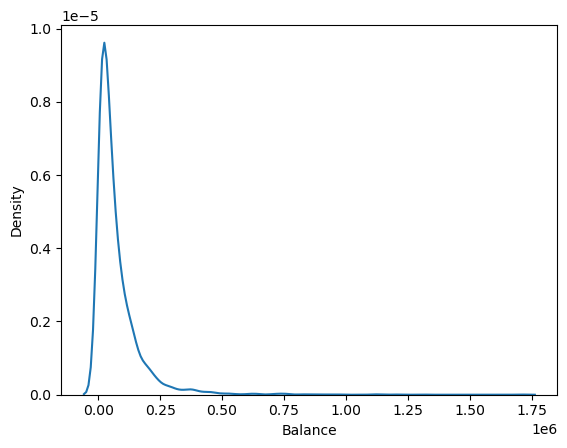

Qual_miles


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


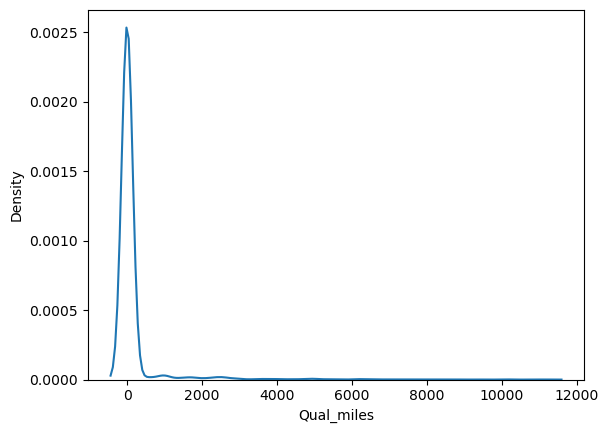

cc1_miles


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


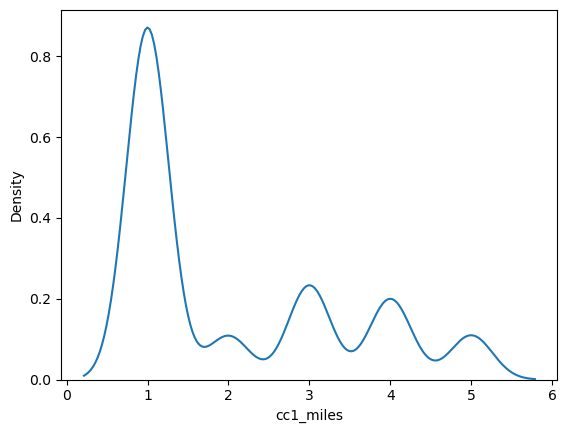

cc2_miles


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


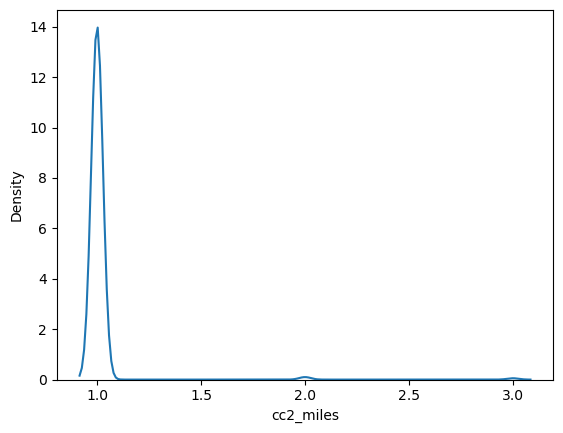

cc3_miles


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


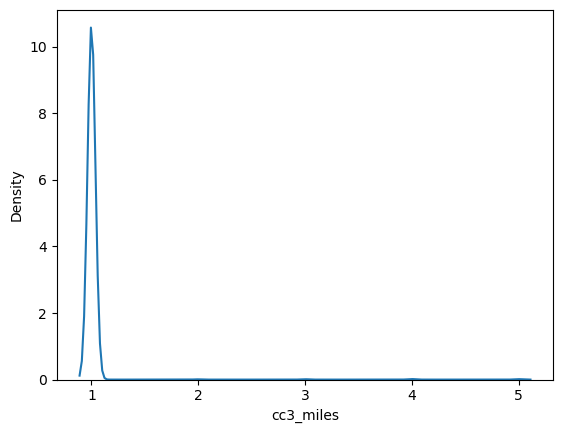

Bonus_miles


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


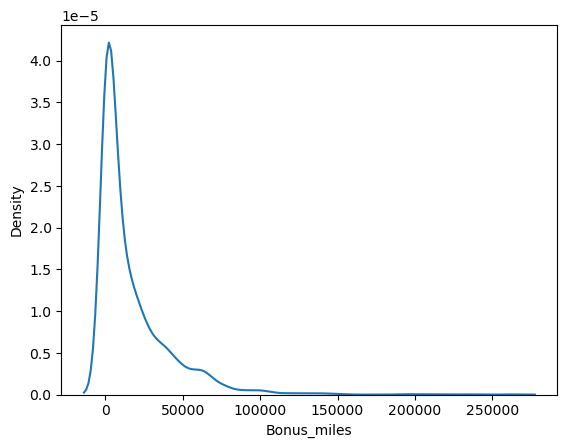

Bonus_trans


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


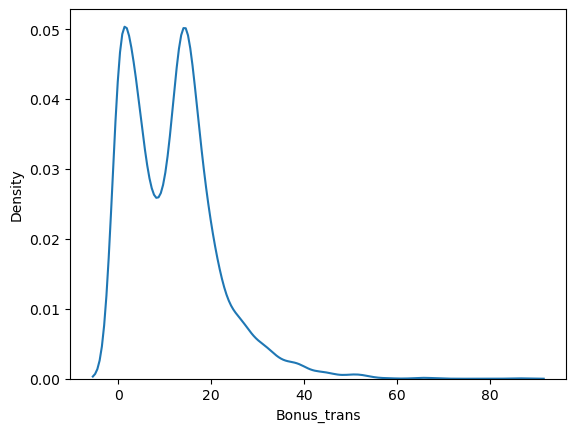

Flight_miles_12mo


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


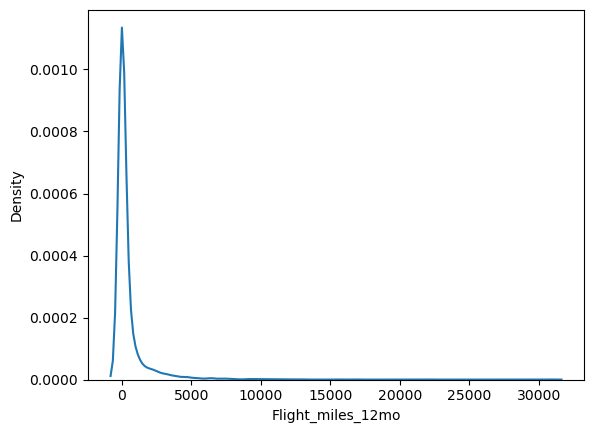

Flight_trans_12


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


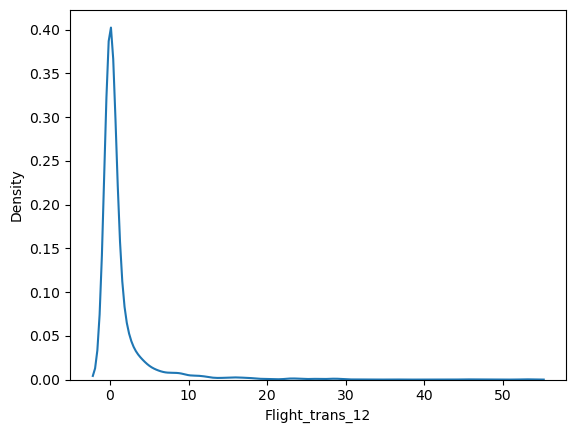

Days_since_enroll


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


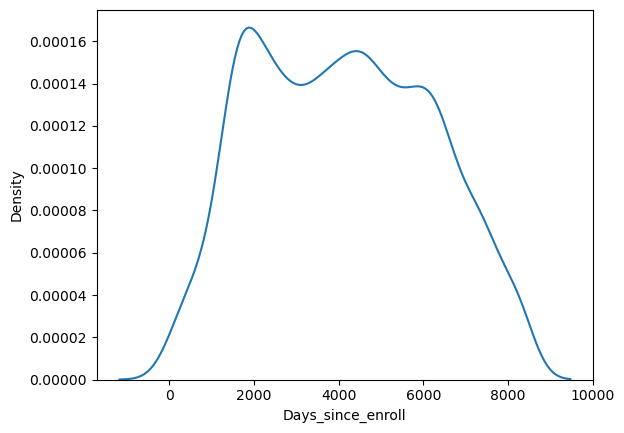

In [33]:
 # Kernel Density for every feature, singled out

for n in dataset1.columns:
    print(n)
    sns.kdeplot(df[n])
    plt.show()

In [34]:
# Normalize and standardize
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(dataset1)
df_norm.shape

(3105, 10)

# Implement clustering

In [35]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

In [36]:
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,31050.000000
1,2,24457.401627
2,3,20678.263821
3,4,17960.593966
4,5,15608.566478
5,6,13346.055929
6,7,12124.433081
7,8,10958.273975
8,9,10073.901068
9,10,9321.289350


Text(0, 0.5, 'Cluster Errors')

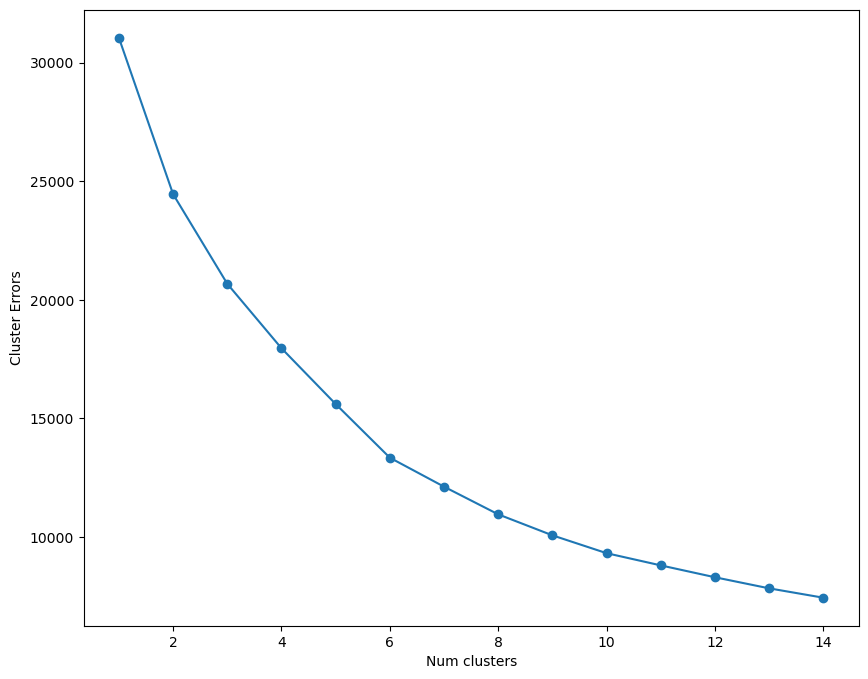

In [37]:
# "Elbow" plot, clusters vs. errors
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

In [38]:
# The optimal number of clusters is 6, as seen from elbow curve.

In [39]:
# applying PCA on std_df

# we consider 0.95 variance in n_components to not lose any data.

from sklearn.decomposition import PCA

pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(df_norm)

# eigenvalues

print(pca_std.singular_values_)

#  variance contained in each formed PCA

print(pca_std.explained_variance_ratio_*100)

# Cummulative variance ratio

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

[93.47111964 74.7912179  56.44863914 55.83228315 55.63692717 55.0128613
 44.8698796  37.59849223]
[28.13800389 18.0152215  10.26231517 10.03943266  9.96930005  9.74690792
  6.4840776   4.55280714]


array([28.13800389, 46.15322539, 56.41554056, 66.45497322, 76.42427326,
       86.17118118, 92.65525878, 97.20806592])

In [40]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

# eigenvalues

print(pca_minmax.singular_values_)

# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[22.39660889 13.63099503 13.10616173  9.71410745  6.67146314  4.76875804]
[47.5446088  17.61131825 16.28125175  8.94422163  4.21870277  2.15549649]


In [42]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardized data with PCA applied.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.32270805695021065


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.35128452039194896


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3655663168762159


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3659427438169527


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.37509657200453644


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.28785182082845034


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2575778160667149


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.27114101985887634


In [44]:
# Silhouette score for MinMaxScalar transformation data with PCA Applied.

for n_clusters in clust_list:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.23479053568959435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.23479053568959435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.23479053568959435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.23479053568959435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.23479053568959435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.23479053568959435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.23479053568959435


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.23479053568959435


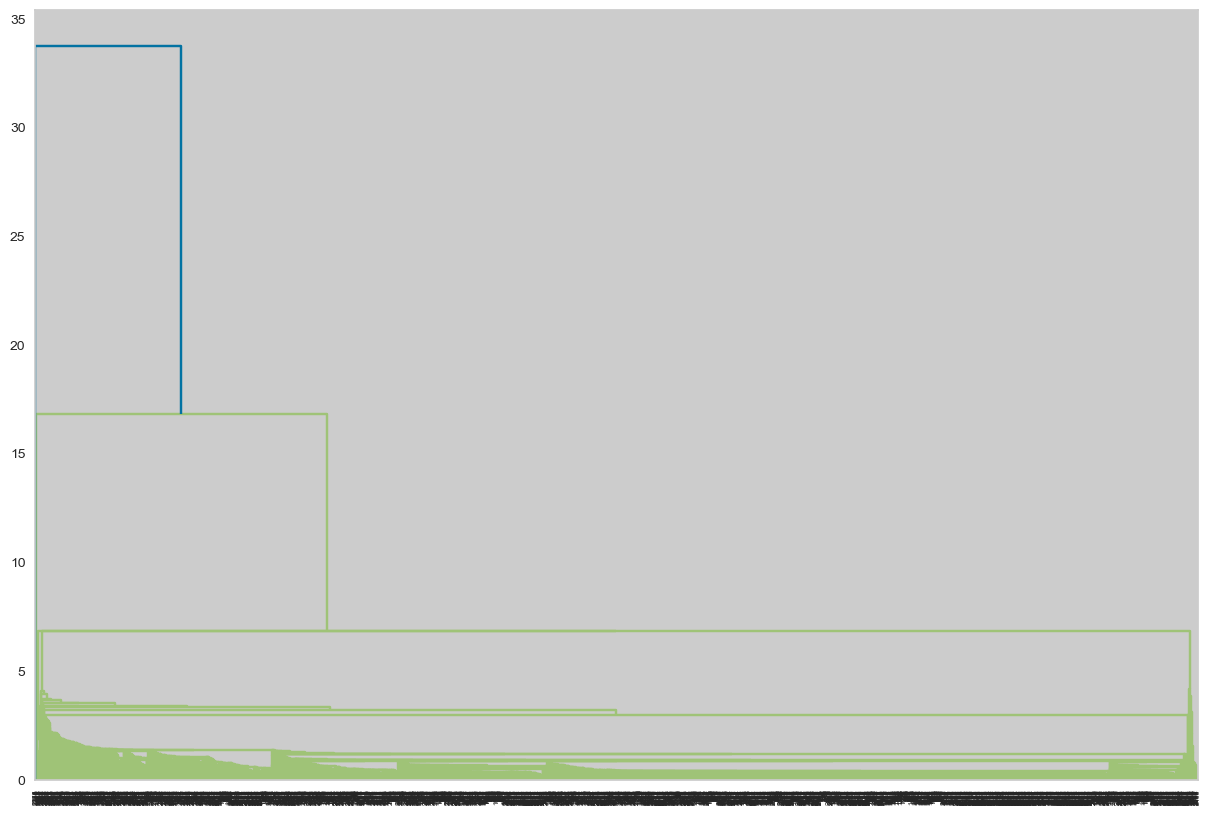

In [45]:
# Hierarchial Clustering with single linkage:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

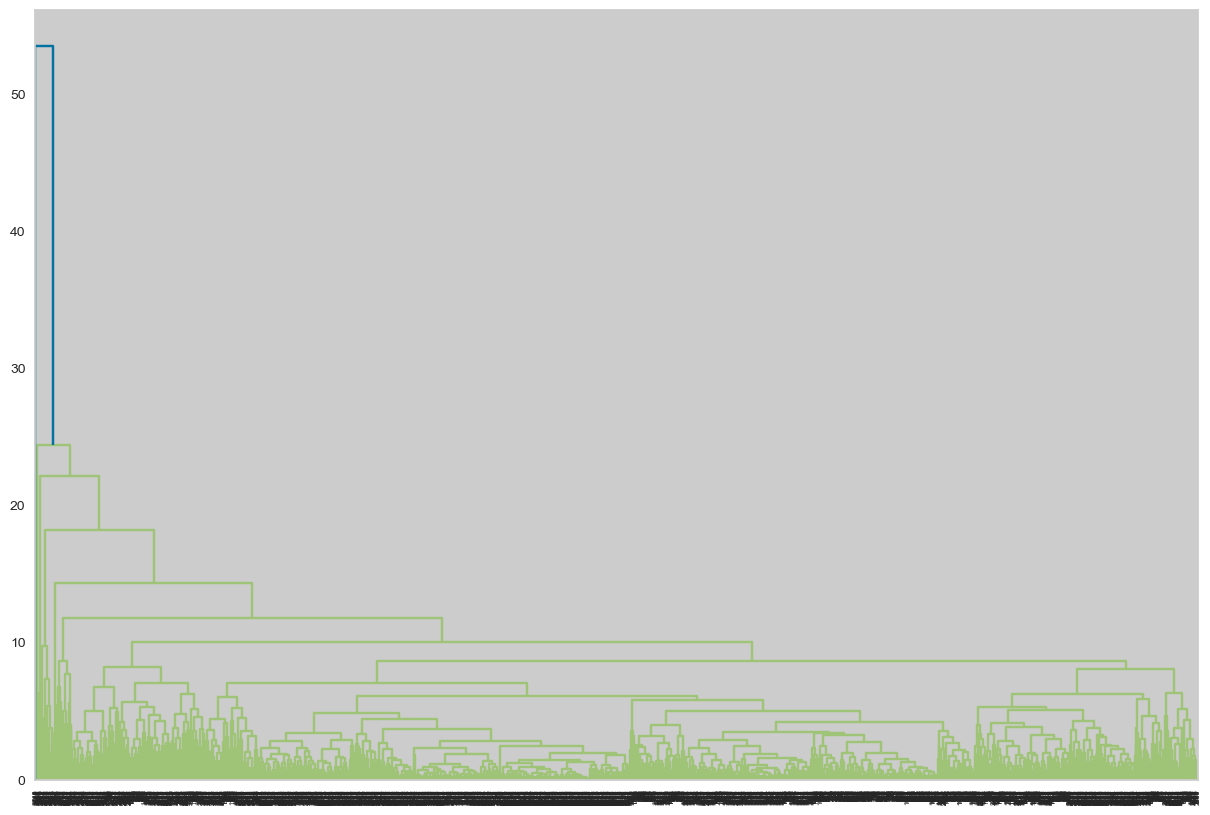

In [46]:
# Hierarchial Clustering with complete linkage as instructed:

plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

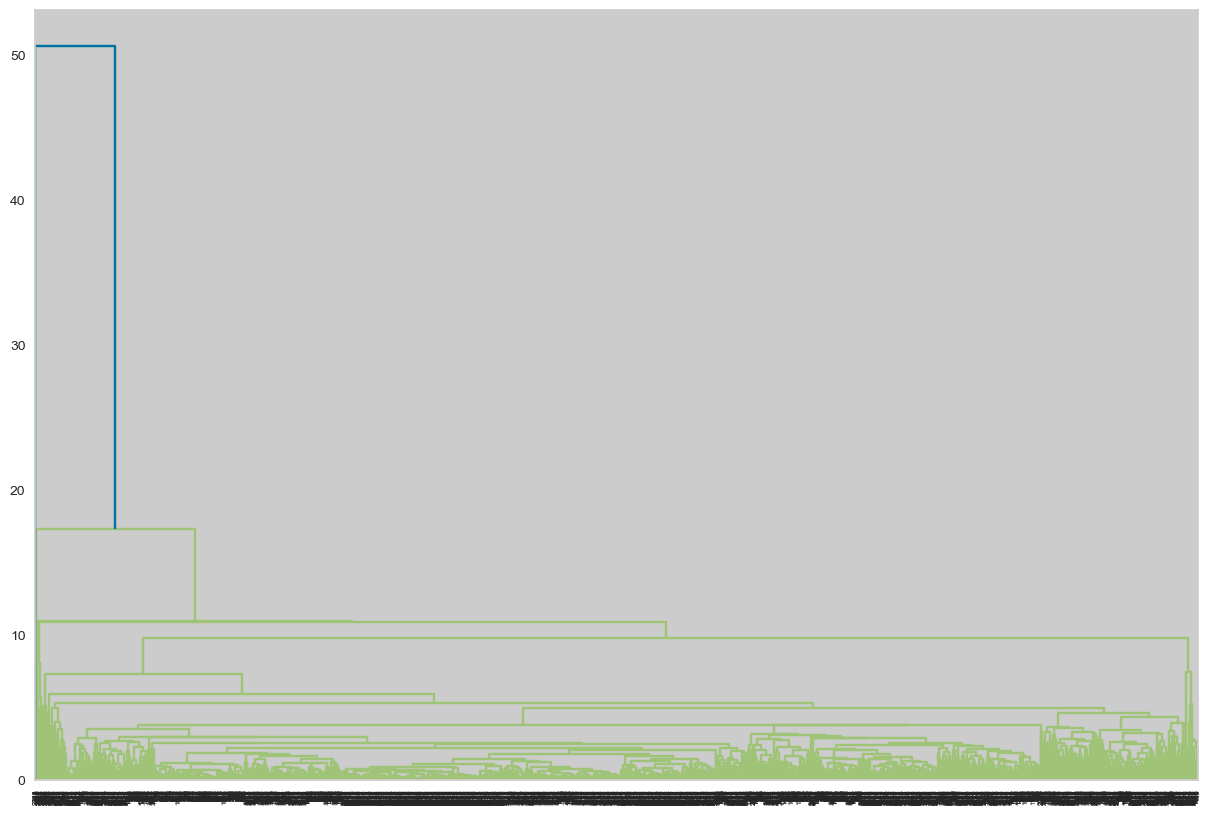

In [47]:
# Hierarchial Clustering with average linkage:

plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

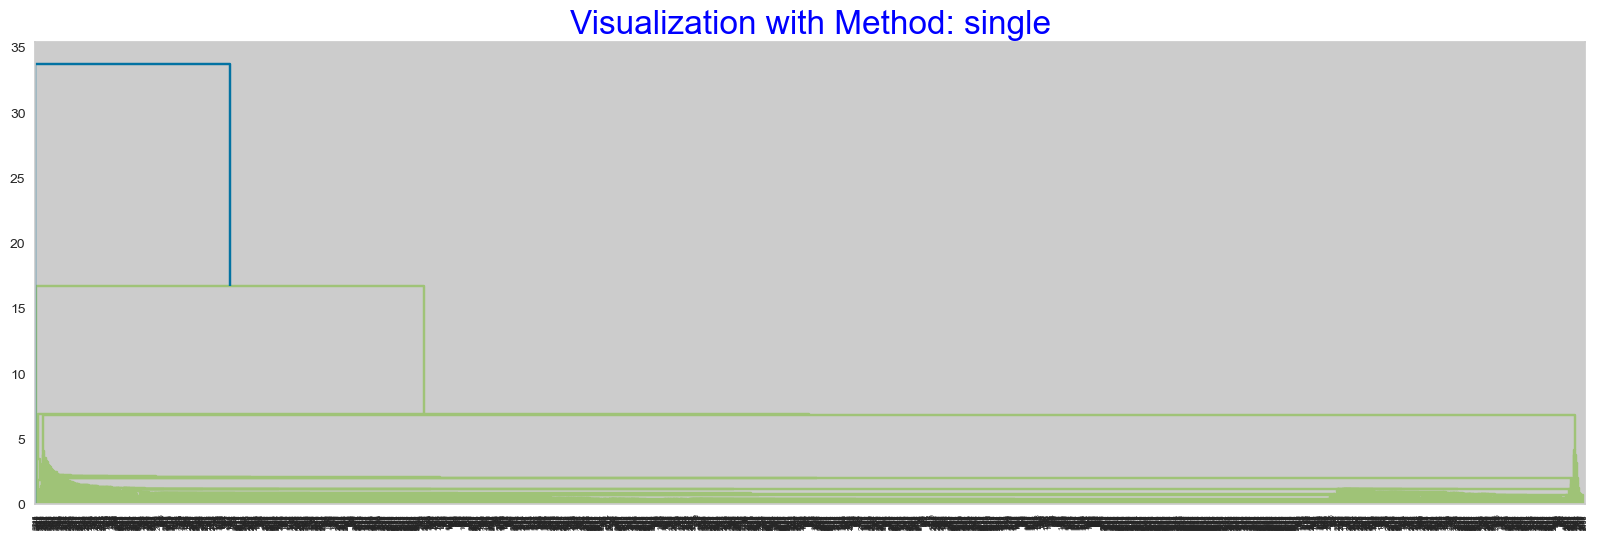

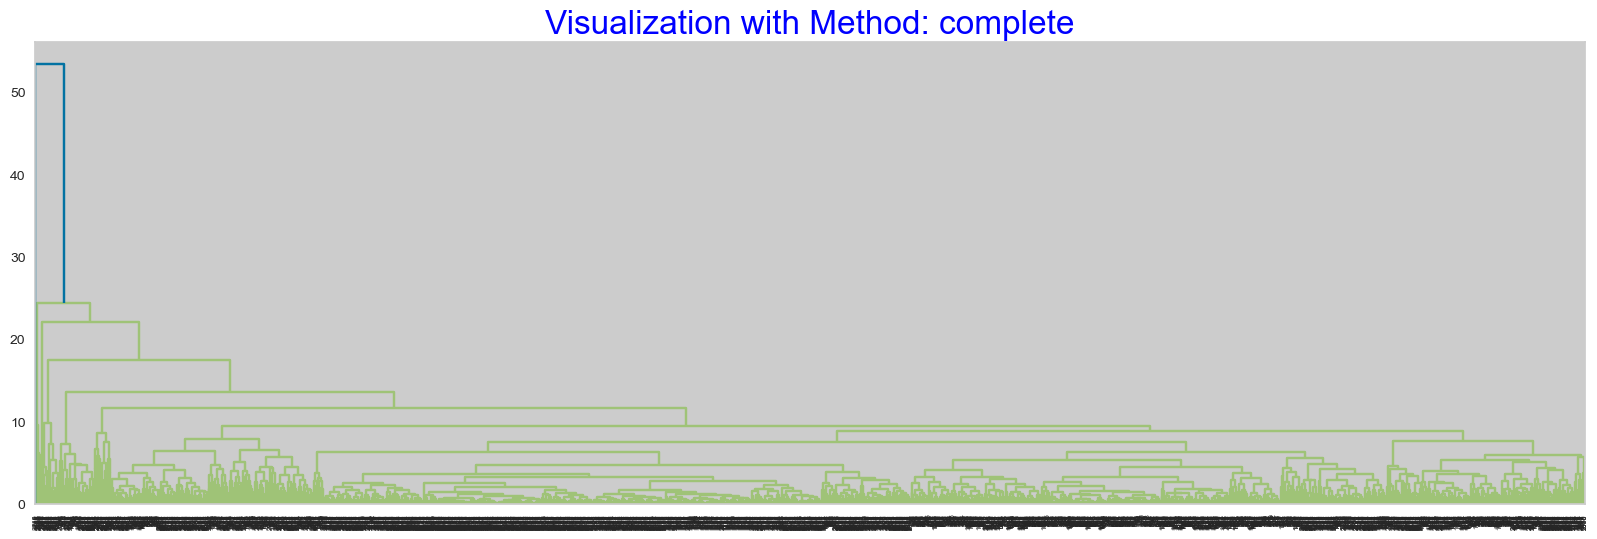

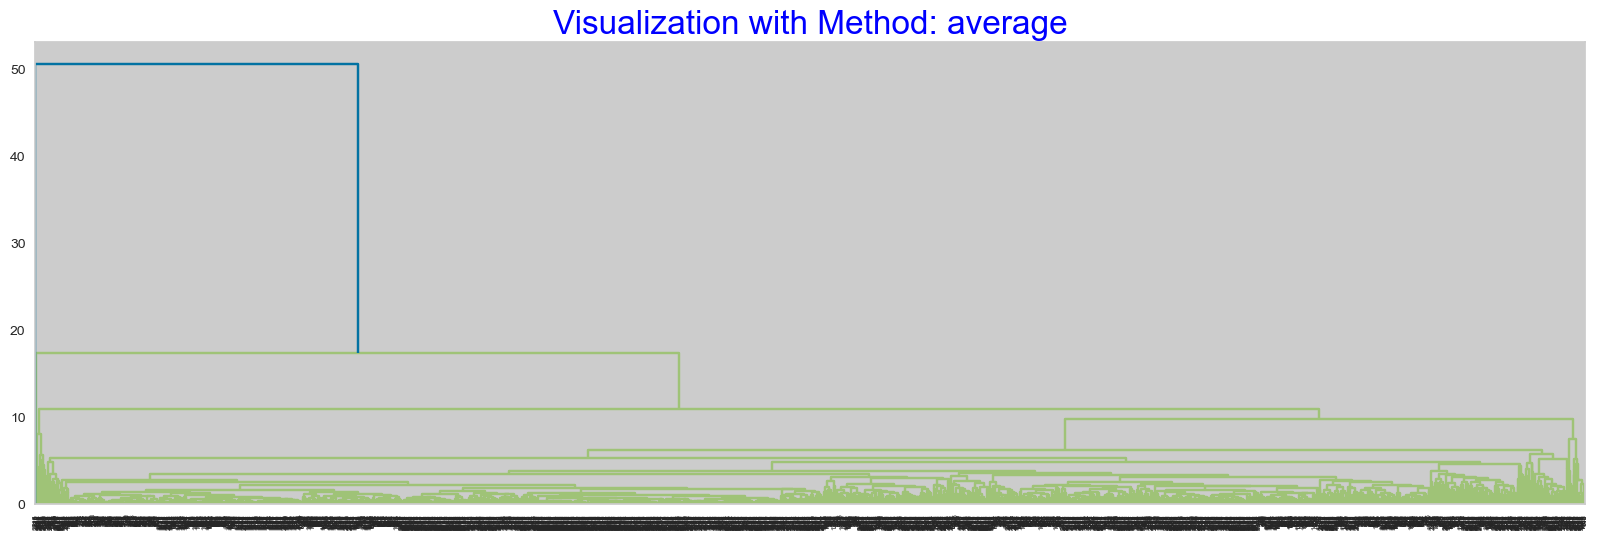

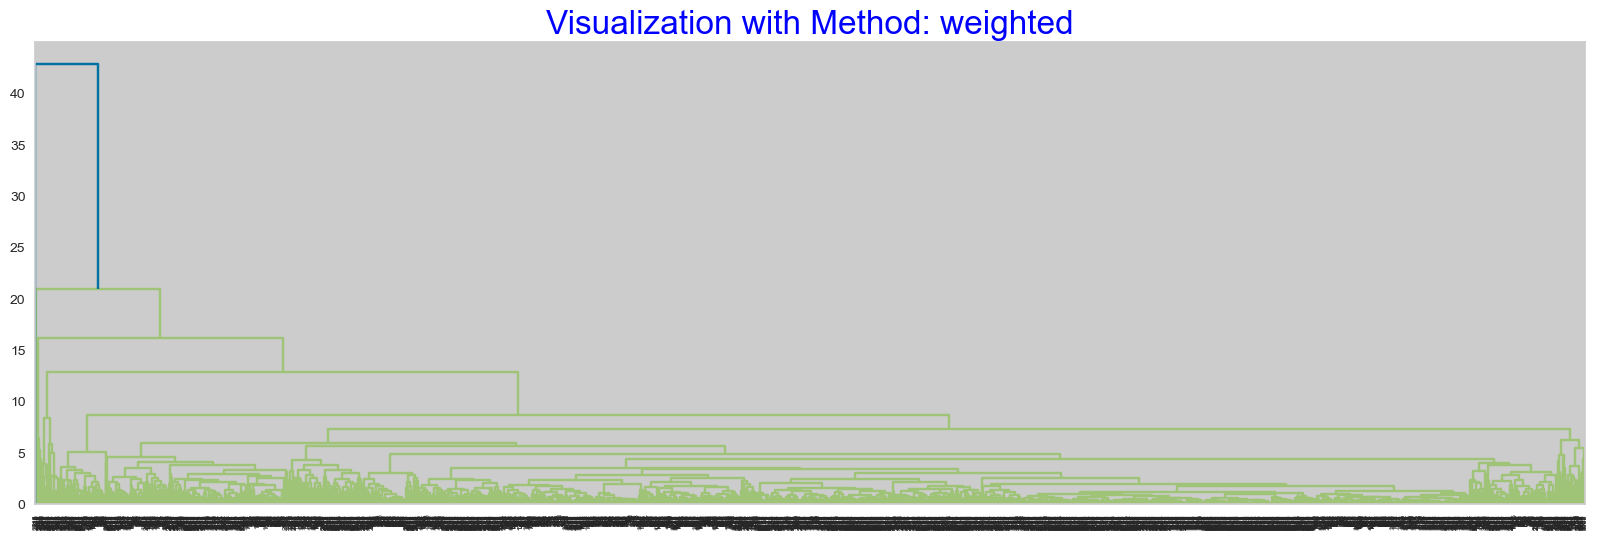

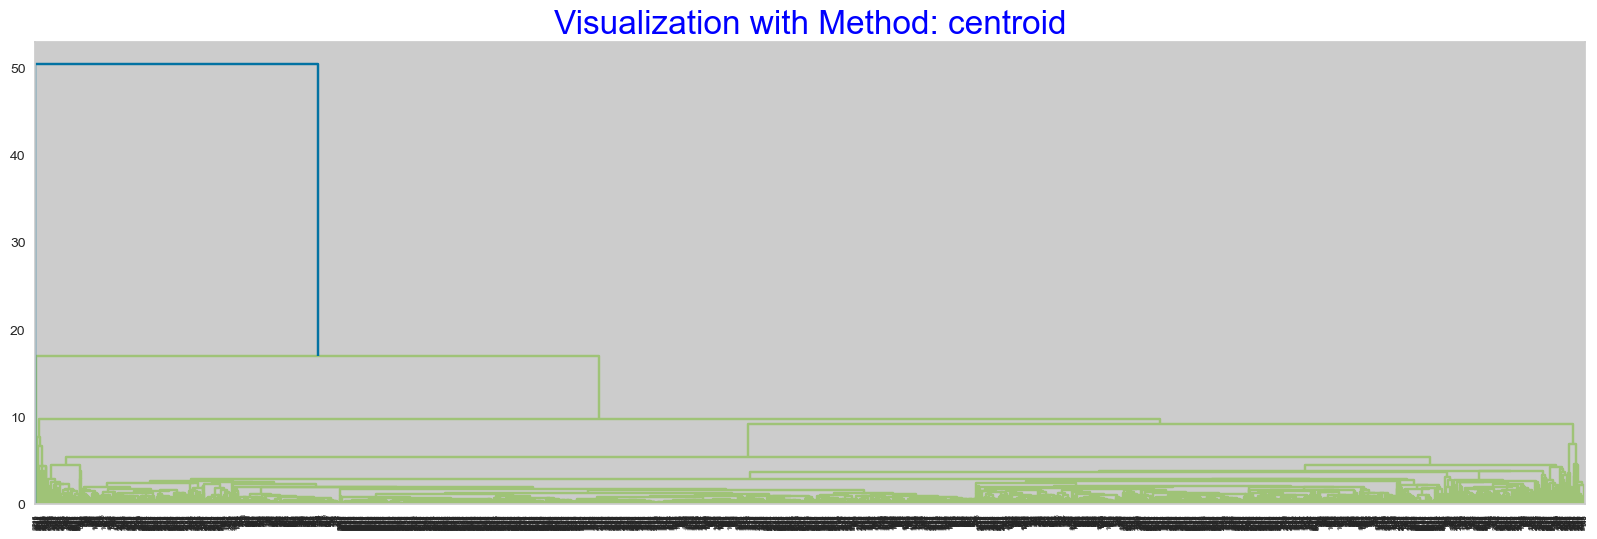

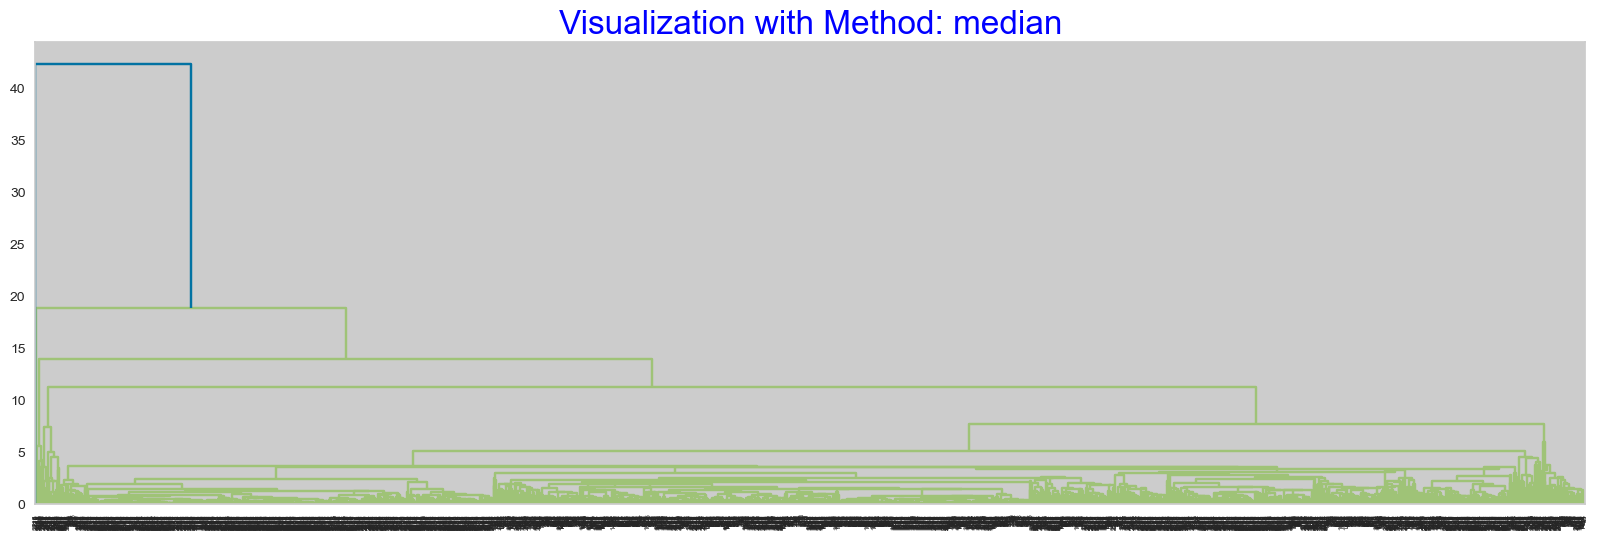

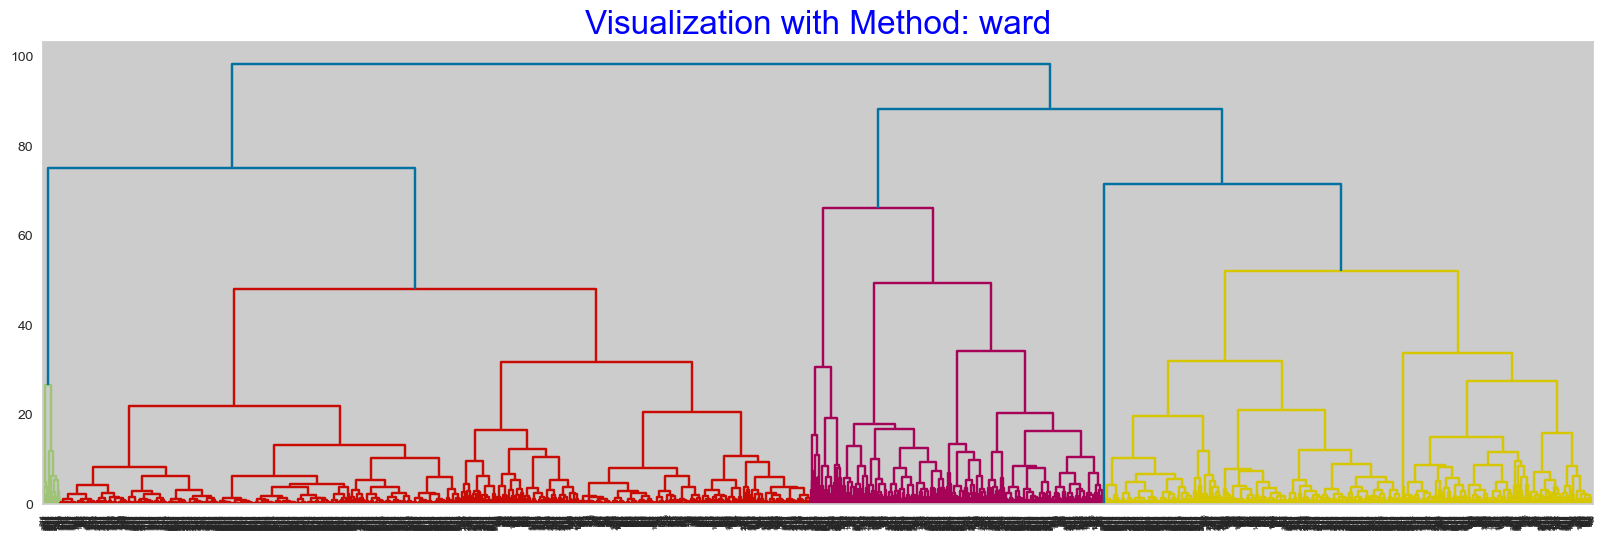

In [48]:
# Applying Dendrogram on PCA data using different linkage methods. 
# We can see number of clusters using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualization with Method: {}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [49]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie
print("Cluster labels for each point:", agg_clustering.labels_, "\n")
print("Number of leaves in the hierarchical tree:", agg_clustering.n_leaves_, "\n")
print("The estimated number of connected components in the graph:", agg_clustering.n_connected_components_, "\n")
print("The children of each non-leaf node:\n", agg_clustering.children_, "\n")
print("Clustering Score:", (silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3))


(3105,)
Cluster labels for each point: [1 1 1 ... 1 1 1] 

Number of leaves in the hierarchical tree: 3105 

The estimated number of connected components in the graph: 1 

The children of each non-leaf node:
 [[2552 2997]
 [ 832  923]
 [2057 2455]
 ...
 [6204 6205]
 [6178 6206]
 [2216 6207]] 

Clustering Score: 64.72


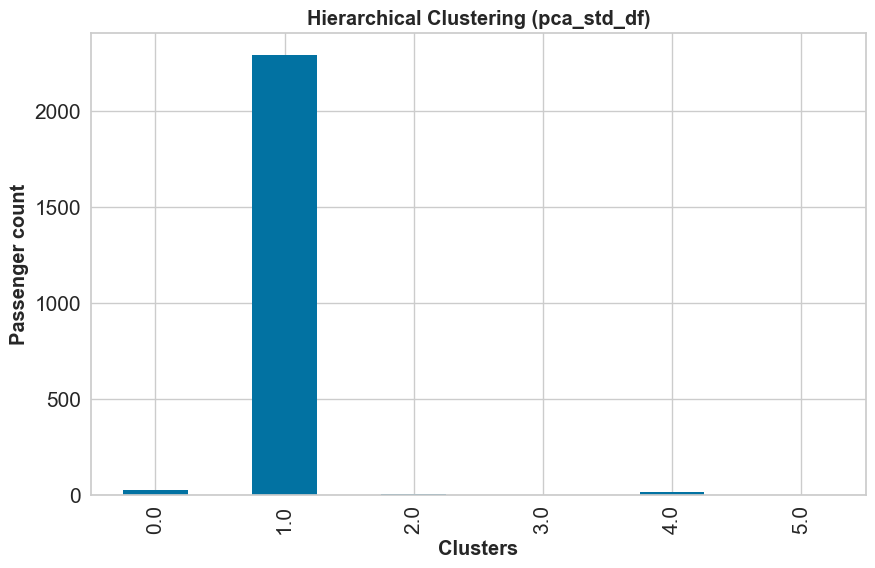

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Hie_Clustering,,,,,,,,,,
0.0,25,25,25,25,25,25,25,25,25,25
1.0,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295
2.0,2,2,2,2,2,2,2,2,2,2
3.0,1,1,1,1,1,1,1,1,1,1
4.0,14,14,14,14,14,14,14,14,14,14
5.0,1,1,1,1,1,1,1,1,1,1


In [50]:
# Creating dataframe of cluster labels.

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([dataset1.copy(), hie_cluster], axis=1)
hie_df.head()

# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Balance Labels')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Passenger count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

hie_df.groupby(['Hie_Clustering']).count()

In [51]:
model1 = KMeans(n_clusters = 5, max_iter=50)
model1.fit(pca_std_df)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [52]:
# analysis of clusters formed

dataset1.index = pd.RangeIndex(len(dataset1.index))
df_km = pd.concat([dataset1,pd.Series(model1.labels_)],axis=1)
df_km.columns = ["Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll", "ClusterID"]  

In [53]:
df_km.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
ClusterID            0
dtype: int64

In [54]:
km_cluster_Balance = pd.DataFrame(df_km.groupby('ClusterID')['Balance'].mean())
km_cluster_Qual_miles = pd.DataFrame(df_km.groupby('ClusterID')['Qual_miles'].mean())
km_cluster_cc1_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc1_miles'].mean())
km_cluster_cc2_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc2_miles'].mean())
km_cluster_cc3_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc3_miles'].mean())
km_cluster_Bonus_miles = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_miles'].mean())
km_cluster_Bonus_trans = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_trans'].mean())
km_cluster_Flight_miles_12mo = pd.DataFrame(df_km.groupby('ClusterID')['Flight_miles_12mo'].mean())
km_cluster_Flight_trans_12 = pd.DataFrame(df_km.groupby('ClusterID')['Flight_trans_12'].mean())
km_cluster_Days_since_enroll = pd.DataFrame(df_km.groupby('ClusterID')['Days_since_enroll'].mean())


df = pd.concat([pd.Series([1,2,3,4,5]),
km_cluster_Balance,
km_cluster_Qual_miles,
km_cluster_cc1_miles,
km_cluster_cc2_miles,
km_cluster_cc3_miles,
km_cluster_Bonus_miles,
km_cluster_Bonus_trans,
km_cluster_Flight_miles_12mo,
km_cluster_Flight_trans_12,
km_cluster_Days_since_enroll],axis=1)
df.columns = ["ClusterID","Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles",  "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll"]
df

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,29010.948718,61.899715,1.091168,1.000000,1.000000,2966.891738,5.549288,6.875783,0.047863,3590.458689
1,2,76566.988421,108.843158,3.253684,1.000000,1.002105,26250.800000,16.716842,32.449474,0.138947,4516.498947
2,3,61474.000000,0.000000,1.000000,1.000000,4.000000,47717.000000,14.000000,0.000000,0.000000,3354.000000
3,4,62806.534247,236.257534,1.660274,1.000000,1.000000,10146.912329,9.830137,475.578082,1.876712,3995.268493
4,5,40919.558824,0.000000,1.088235,2.323529,1.000000,12405.235294,14.647059,75.000000,0.382353,3827.235294


<Axes: xlabel='ClusterID', ylabel='Balance'>

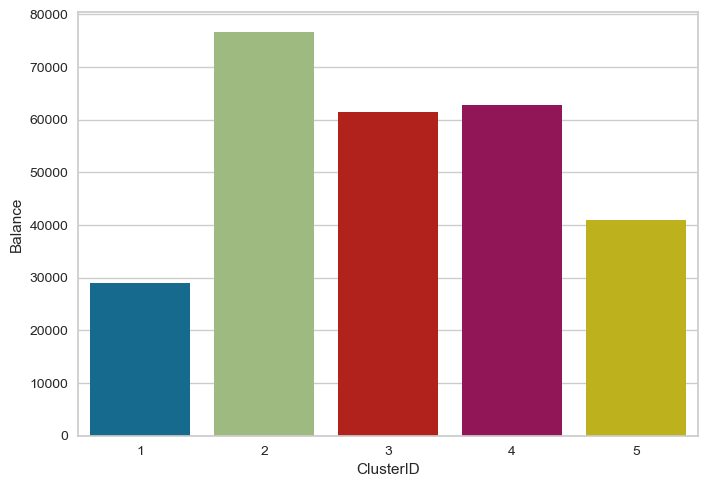

In [55]:
# analyze clusters
sns.barplot(data=df,x='ClusterID',y='Balance')

<Axes: xlabel='ClusterID', ylabel='Qual_miles'>

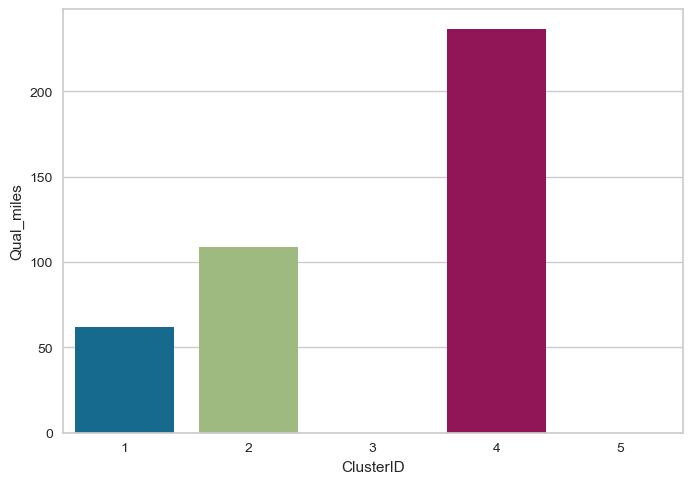

In [57]:
sns.barplot(data=df,x='ClusterID',y='Qual_miles')

<Axes: xlabel='ClusterID', ylabel='cc1_miles'>

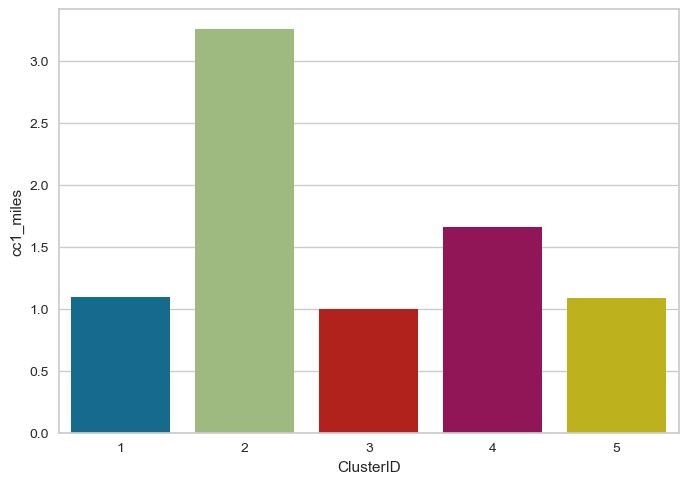

In [58]:
sns.barplot(data=df,x='ClusterID',y='cc1_miles')


<Axes: xlabel='ClusterID', ylabel='cc2_miles'>

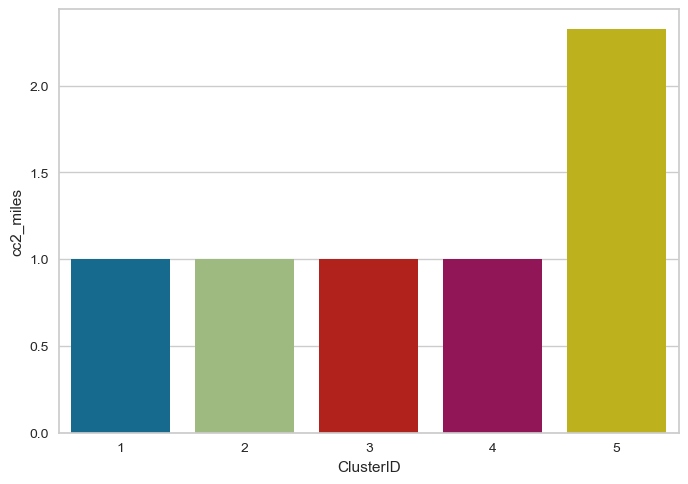

In [59]:
sns.barplot(data=df,x='ClusterID',y='cc2_miles')


<Axes: xlabel='ClusterID', ylabel='cc3_miles'>

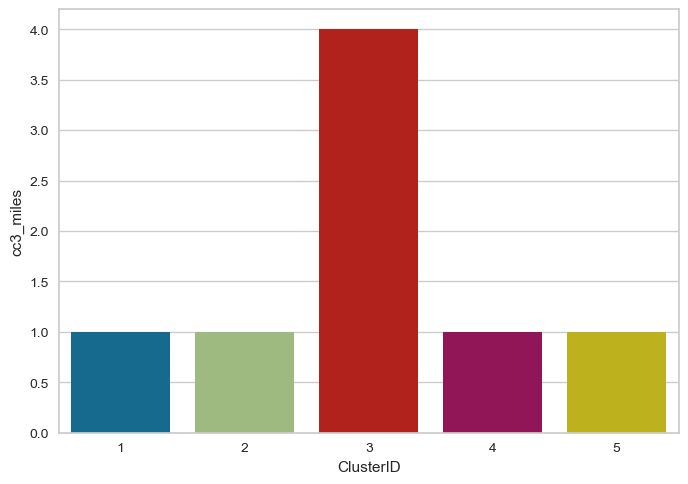

In [60]:
sns.barplot(data=df,x='ClusterID',y='cc3_miles')


<Axes: xlabel='ClusterID', ylabel='Bonus_miles'>

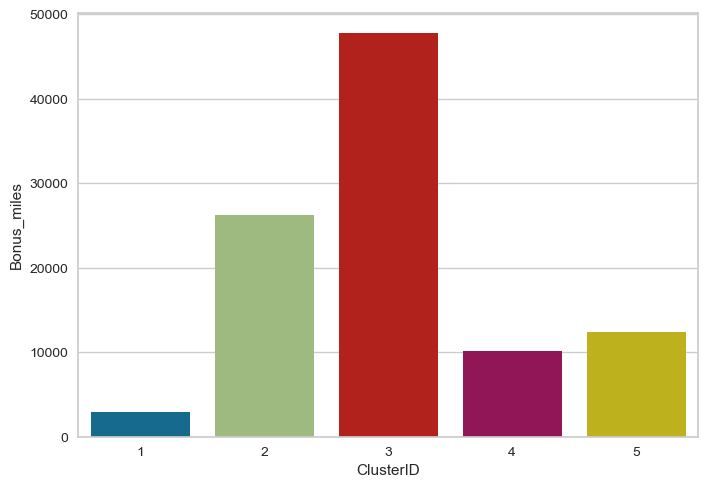

In [61]:
sns.barplot(data=df,x='ClusterID',y='Bonus_miles')


<Axes: xlabel='ClusterID', ylabel='Bonus_trans'>

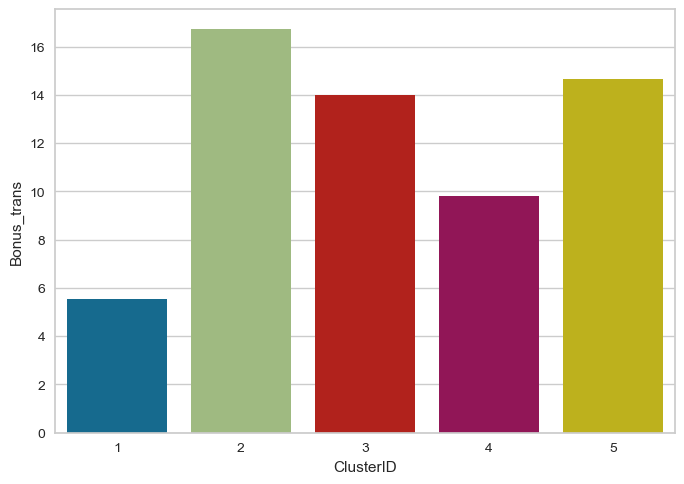

In [62]:
sns.barplot(data=df,x='ClusterID',y='Bonus_trans')


<Axes: xlabel='ClusterID', ylabel='Flight_miles_12mo'>

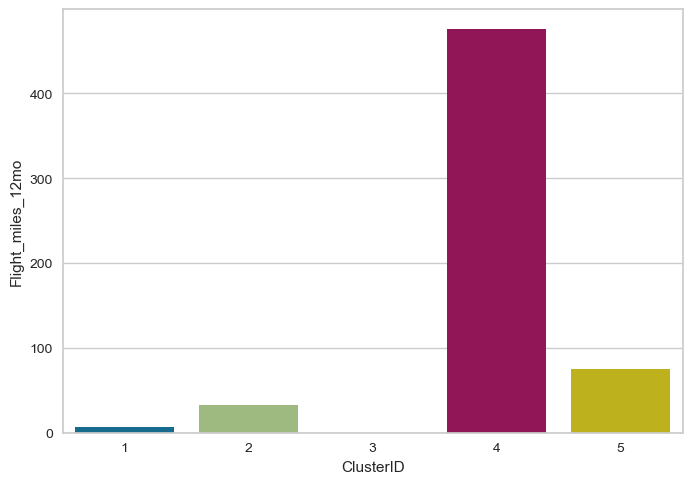

In [63]:
sns.barplot(data=df,x='ClusterID',y='Flight_miles_12mo')


<Axes: xlabel='ClusterID', ylabel='Flight_trans_12'>

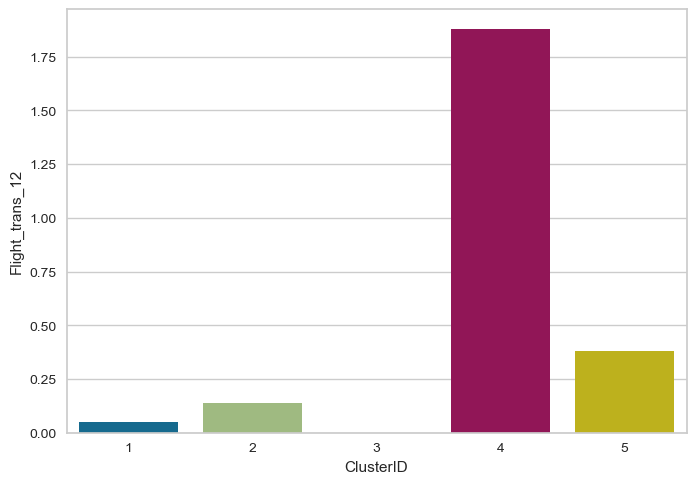

In [64]:
sns.barplot(data=df,x='ClusterID',y='Flight_trans_12')


<Axes: xlabel='ClusterID', ylabel='Days_since_enroll'>

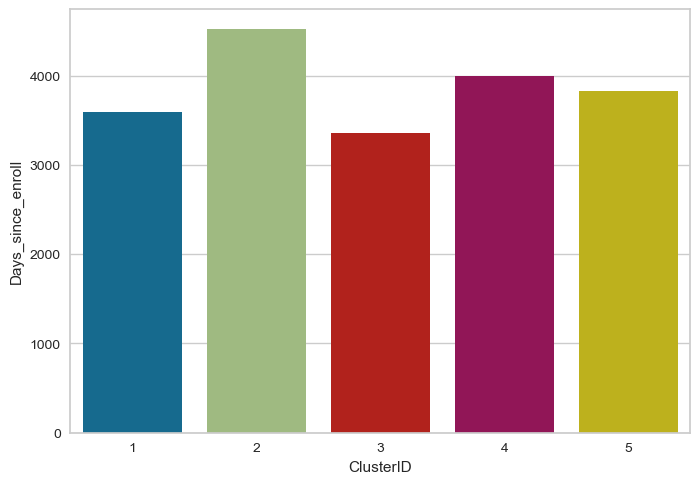

In [65]:
sns.barplot(data=df,x='ClusterID',y='Days_since_enroll')

In [66]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

Kmeans_df = pd.concat([dataset1.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans_Clustering
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,16420,0,1,1,1,0,0,0,0,6942,0


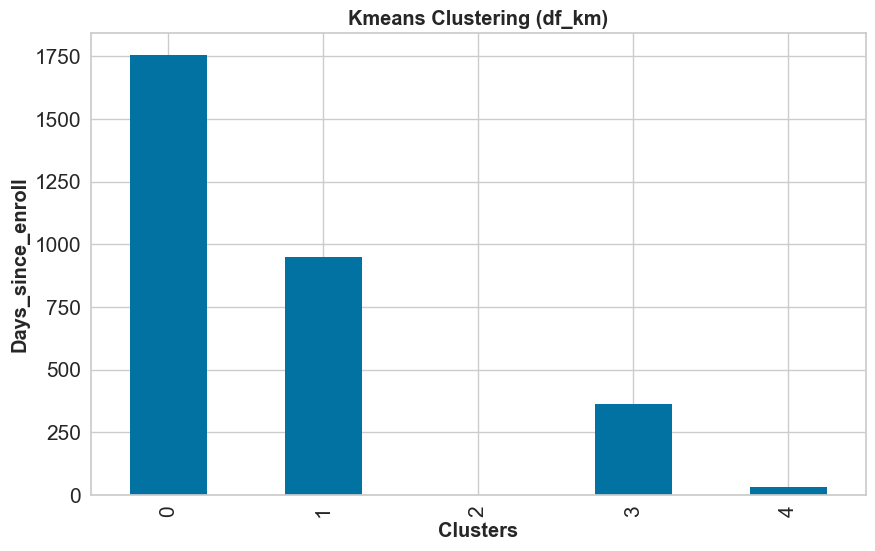

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Days_since_enroll')
plt.title('Kmeans Clustering (df_km)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Days_since_enroll', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

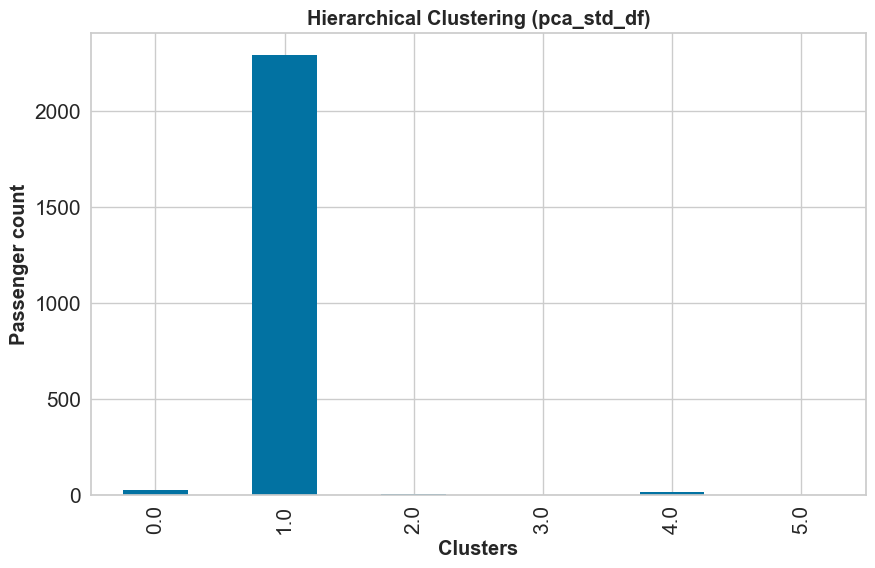

In [68]:
# Comparing this with our Hierarchial Clustering Bar plot:

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Balance Labels')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Passenger count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [69]:
# K Means seems to be more successful in division of clusters

In [70]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster_1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster_2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster_3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster_4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster_5_avg'])

In [71]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster_1_avg,Cluster_2_avg,Cluster_3_avg,Cluster_4_avg,Cluster_5_avg
Balance,29010.948718,76566.988421,61474.0,62806.534247,40919.558824
Qual_miles,61.899715,108.843158,0.0,236.257534,0.000000
cc1_miles,1.091168,3.253684,1.0,1.660274,1.088235
cc2_miles,1.000000,1.000000,1.0,1.000000,2.323529
cc3_miles,1.000000,1.002105,4.0,1.000000,1.000000
Bonus_miles,2966.891738,26250.800000,47717.0,10146.912329,12405.235294
Bonus_trans,5.549288,16.716842,14.0,9.830137,14.647059
Flight_miles_12mo,6.875783,32.449474,0.0,475.578082,75.000000
Flight_trans_12,0.047863,0.138947,0.0,1.876712,0.382353
Days_since_enroll,3590.458689,4516.498947,3354.0,3995.268493,3827.235294


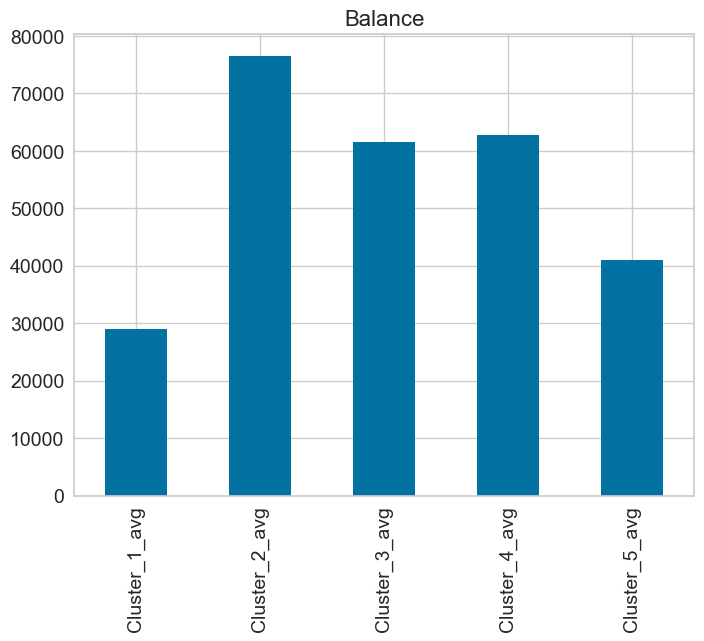

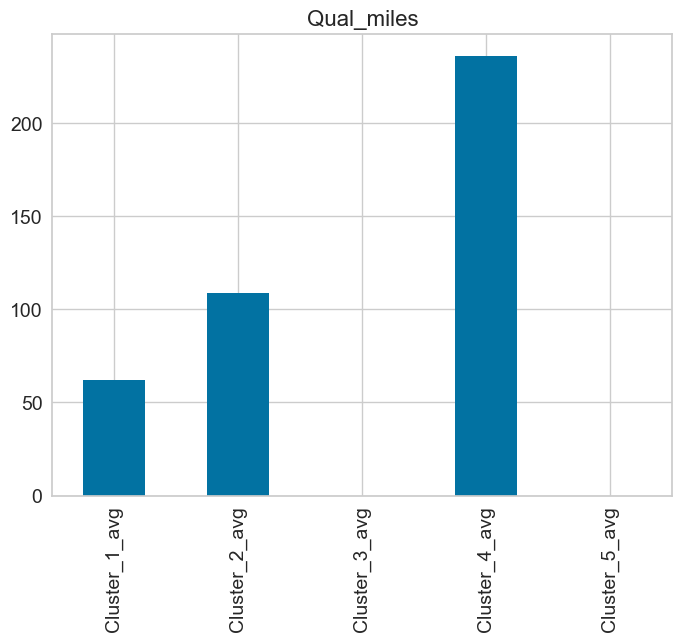

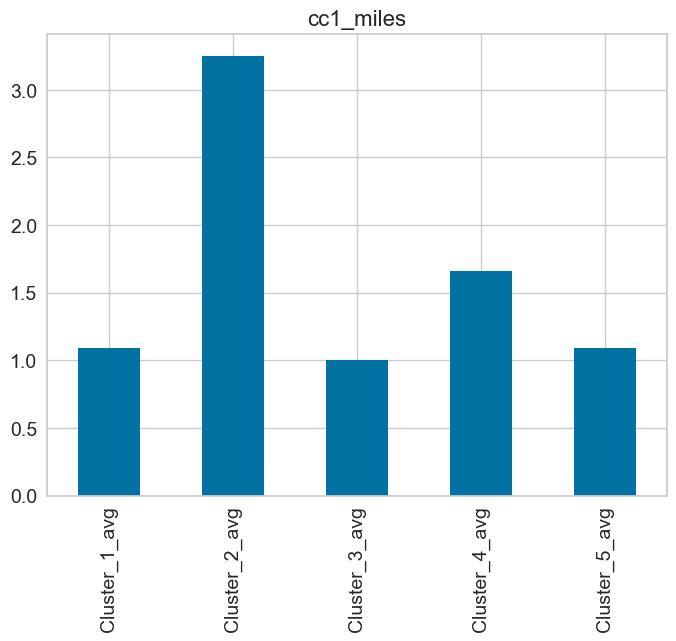

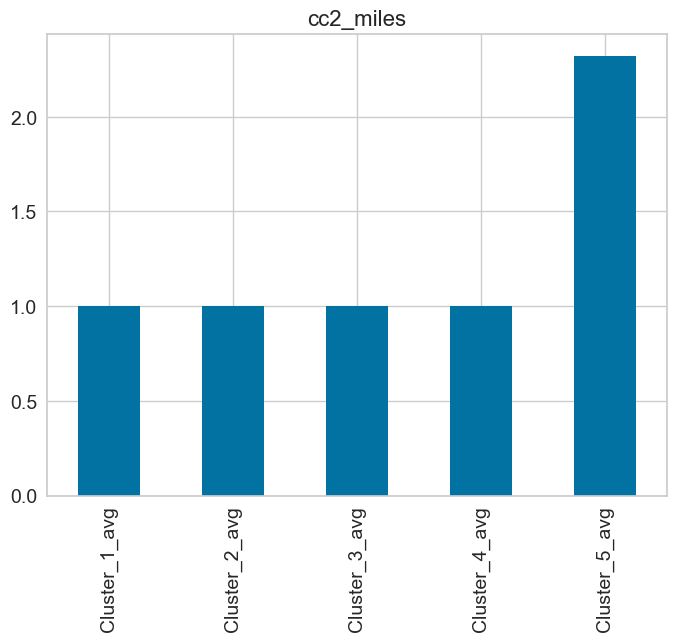

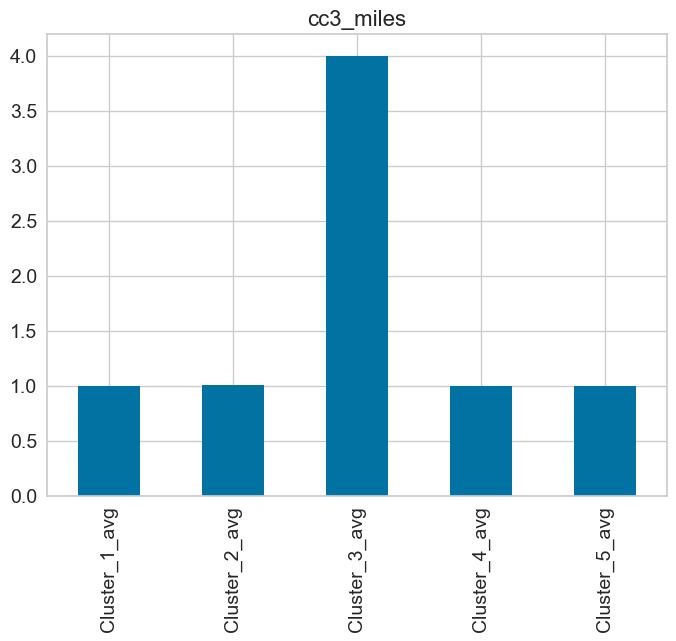

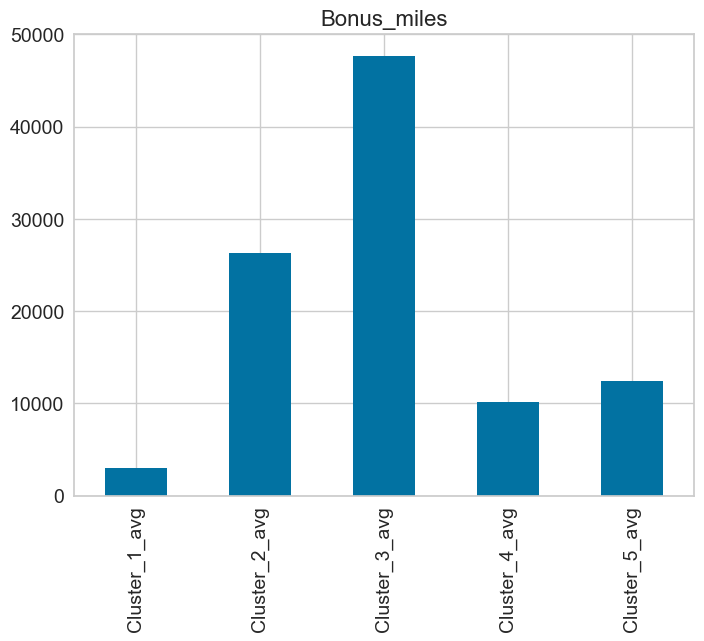

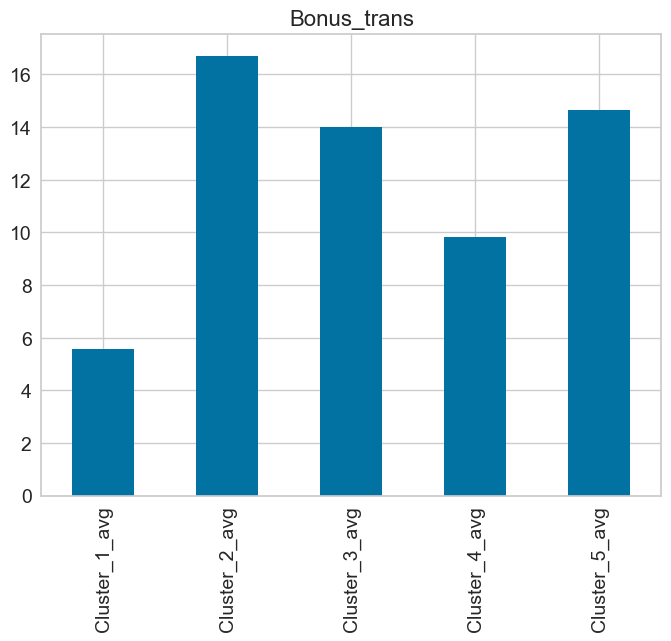

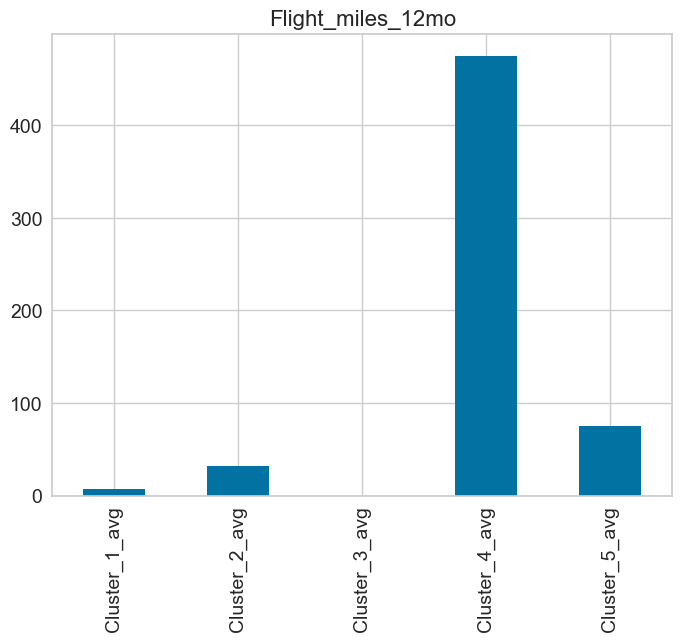

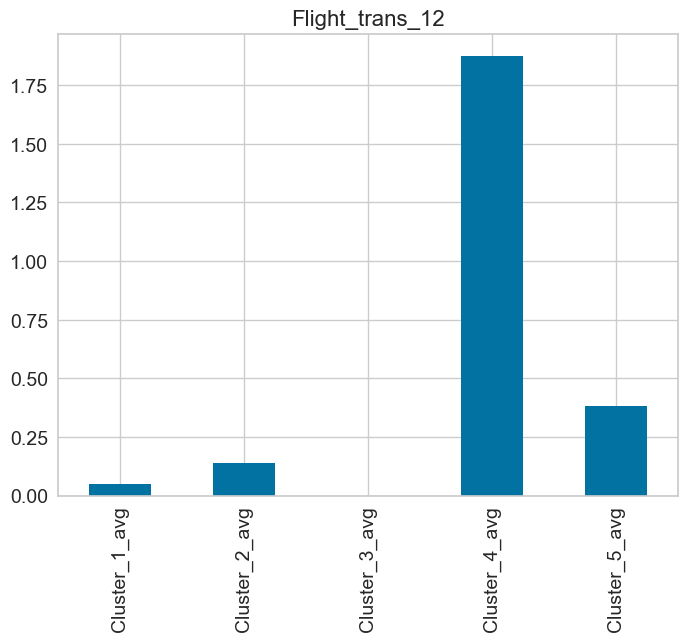

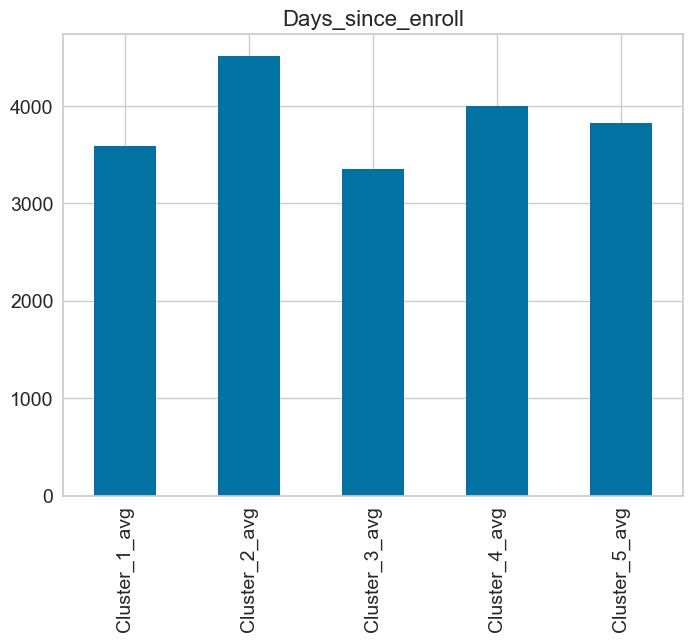

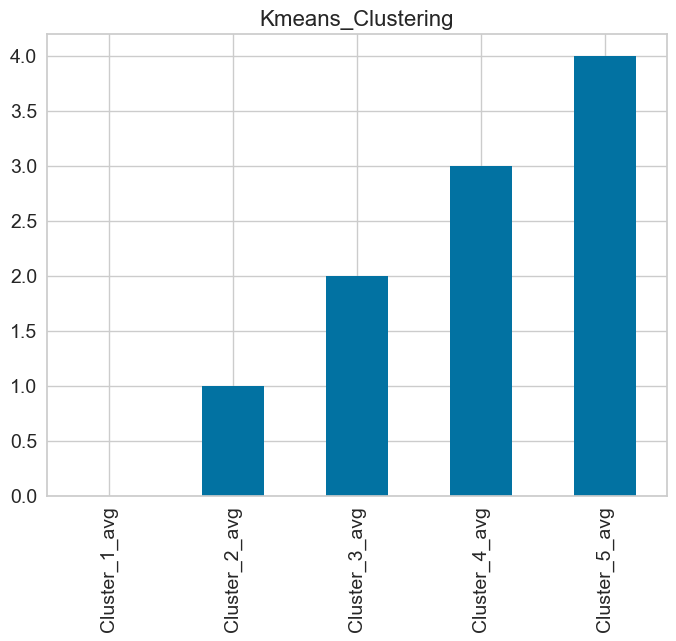

In [72]:
# Looking at the bar plots all together once again

for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()